In [289]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd
import math as mt
import ROOT
import os
import random
import MyFunction as mf
from array import array
from ROOT import TCanvas, gStyle, TFile, TProfile, TNtuple, TH1D, TH2D, TH3D, TGraph, TMultiGraph, TPad, THStack, TH1F, TLegend, gROOT 

In [290]:
DataFileLocation = "/home/fardousr/Desktop/Output/Collimator_Data/Without 2d letdata/"
DataFileList = os.listdir(DataFileLocation)
File = pd.DataFrame(DataFileList)
print(DataFileList)
display(File)
DataFile = ROOT.TFile(DataFileLocation+"/"+DataFileList[0])

['Coll_Energy_150_Alpha:_0.0_Beta:_18800mm_Radius_3.0mm.root', 'Coll_Energy_150MeV_Radius_0.5mm.root', 'Coll_Energy_150MeV_Radius_1.0mm.root', 'Coll_Energy_150MeV_Radius_2.0mm.root', 'Coll_Energy_150MeV_Radius_3.0mm.root', 'Coll_Energy_150MeV_Radius_4.0mm.root', 'Coll_Energy_150MeV_Radius_6.0mm.root', 'Coll_Energy_150MeV_Radius_8.0mm.root', 'Coll_Energy_150MeV_Radius_10.mm.root']


,0
0,Coll_Energy_150_Alpha:_0.0_Beta:_18800mm_Radiu...
1,Coll_Energy_150MeV_Radius_0.5mm.root
2,Coll_Energy_150MeV_Radius_1.0mm.root
3,Coll_Energy_150MeV_Radius_2.0mm.root
4,Coll_Energy_150MeV_Radius_3.0mm.root
5,Coll_Energy_150MeV_Radius_4.0mm.root
6,Coll_Energy_150MeV_Radius_6.0mm.root
7,Coll_Energy_150MeV_Radius_8.0mm.root
8,Coll_Energy_150MeV_Radius_10.mm.root


### <span style='color:Blue'> Depth Dose Graph(Radial) </span>

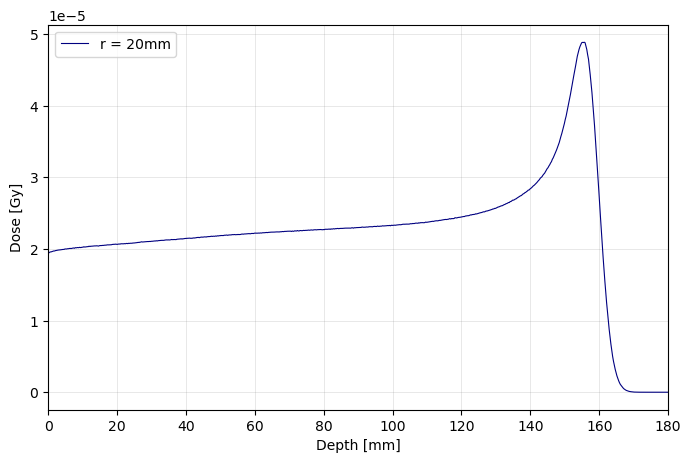

In [293]:
from pylab import rcParams
plt.rcdefaults()
rcParams['figure.figsize'] = 8, 5
plt.rcParams['axes.facecolor'] = 'white'

colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, 7))))

#DataFile = ROOT.TFile(DataFileLocation+"/"+DataFileList[2])
DataFile    = ROOT.TFile("/home/fardousr/Desktop/Output/Collimator_Data/Coll_Energy_150MeV_Radius_6.0mm.root")
r = [20]#1, 2, 3, 5, 8, 12, 15]

for j in range (len(r)): 
    radius       = r[j]     #mm
    radiusBinMax = int(radius)
    lenght = 1/1000       #m
    mass = mt.pi*(radius/1000)**2*lenght*997 #kg/m3 

    EnergyHisto = DataFile.Get('ProtonRadialHisto').ProjectionX("X", 1, radiusBinMax)

    Dose     = array( 'd' )
    Depth    = array( 'd' )

    for i in range(1, 801):
        EnergyDeposit = EnergyHisto.GetBinContent(i)*1.60218*10**-19  #J
        Dose.append(EnergyDeposit/mass)
        Depth.append(EnergyHisto.GetXaxis().GetBinCenter(i)) 
    lineLegend = "r = "+str(r[j])+"mm" 
    plt.plot(Depth, Dose, label = lineLegend, linewidth=0.8)
    plt.grid(alpha =0.25, axis='both' , color='gray', linestyle='-', linewidth=.5)
    plt.legend(loc='upper left')
    plt.xlabel("Depth [mm]")
    plt.ylabel("Dose [Gy]")
    plt.xlim(0,180)
plt.savefig("Radius_6mm_DoseFromRZData.png", dpi = 500)
plt.show()

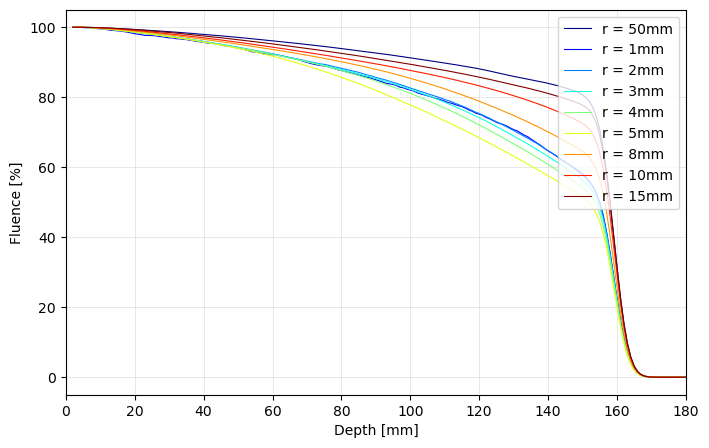

In [286]:
from pylab import rcParams
plt.rcdefaults()
rcParams['figure.figsize'] = 8, 5
plt.rcParams['axes.facecolor'] = 'white'

colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, 9))))

#DataFile = ROOT.TFile(DataFileLocation+"/"+DataFileList[2])
r = [50, 1, 2, 3, 4, 5, 8, 10, 15]

FluenceList =['ProtonFluence', 'Proton1Fluence', 'Proton2Fluence', 'Proton3Fluence', 'Proton4Fluence', 'Proton5Fluence','Proton8Fluence','Proton10Fluence', 'Proton15Fluence']

for j in range (len(FluenceList)): 

    Fluence = DataFile.Get(FluenceList[j])

    Num      = array( 'd' )
    Depth    = array( 'd' )

    for i in range(1, 201):
        maxbin = Fluence.GetMaximumBin()
        n = Fluence.GetBinContent(i)/Fluence.GetBinContent(maxbin) 
        Num.append(n*100)
        Depth.append(i+1) 
    lineLegend = "r = "+str(r[j])+"mm" 
    plt.plot(Depth, Num, label = lineLegend, linewidth=0.8)
    plt.grid(alpha =0.25, axis='both' , color='gray', linestyle='-', linewidth=.5)
    plt.legend(loc='upper right')
    plt.xlabel("Depth [mm]")
    plt.ylabel("Fluence [%]")
    plt.xlim(0, 180)
plt.savefig("Fluence_Radius_6mm.png", dpi = 500)
plt.show()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file Radius_6mm_RZ_Energy.png has been created


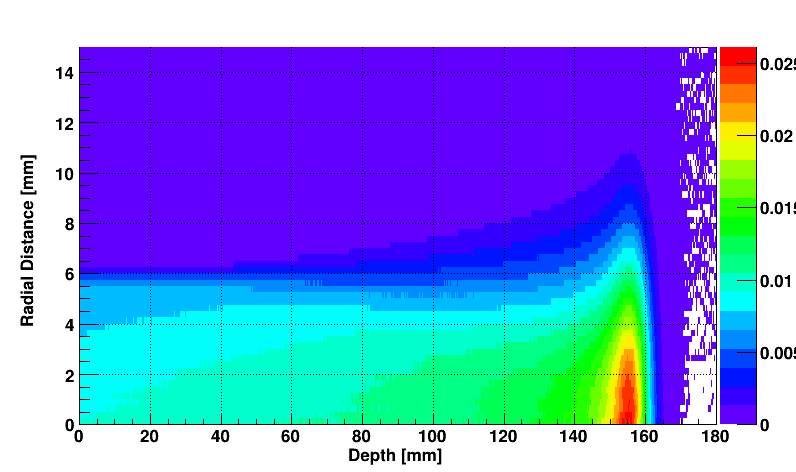

In [288]:

#DataFile    = ROOT.TFile("/home/fardousr/Desktop/Output/Collimator_Data/Coll_Energy_150MeV_Radius_1.0mm.root")

hist = DataFile.Get('ProtonRadialHisto').Clone()
hist.SetDirectory(0)
for i in range (1, 201):
    for j in range (1, 801):
        x = hist.GetBinContent(j,i)#*1.60218e-19
        mass = mt.pi*((0.25*i)**2-(0.25*(i-1))**2)*0.25*997
        hist.SetBinContent(j,i,x/mass*1e-9)
can1 = TCanvas( 'c1', 'Deterministic LET', 200, 10, 800, 500)
can1.SetFillColor( 0 )
can1.GetFrame().SetFillColor( 1 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
can1.SetGrid()
hist.GetXaxis().SetTitle("Depth [mm]");
hist.GetYaxis().SetTitle("Radial Distance [mm]");
hist.Draw()
hist.GetXaxis().CenterTitle();
hist.GetYaxis().CenterTitle();
hist.GetXaxis().SetRangeUser(0, 180);
hist.GetYaxis().SetRangeUser(0, 15);
hist.SetTitle("")
hist.SetStats(0)
hist.Draw("COLZ")
gStyle.SetPalette(1)
can1.Modified()
can1.Update()
can1.Draw()
can1.Print('Radius_6mm_RZ_Energy.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file Distribution of Energy Deposition 350MeV Alpha:7.0 Beta:_300.0mm Sigma_10.mm.png has been created


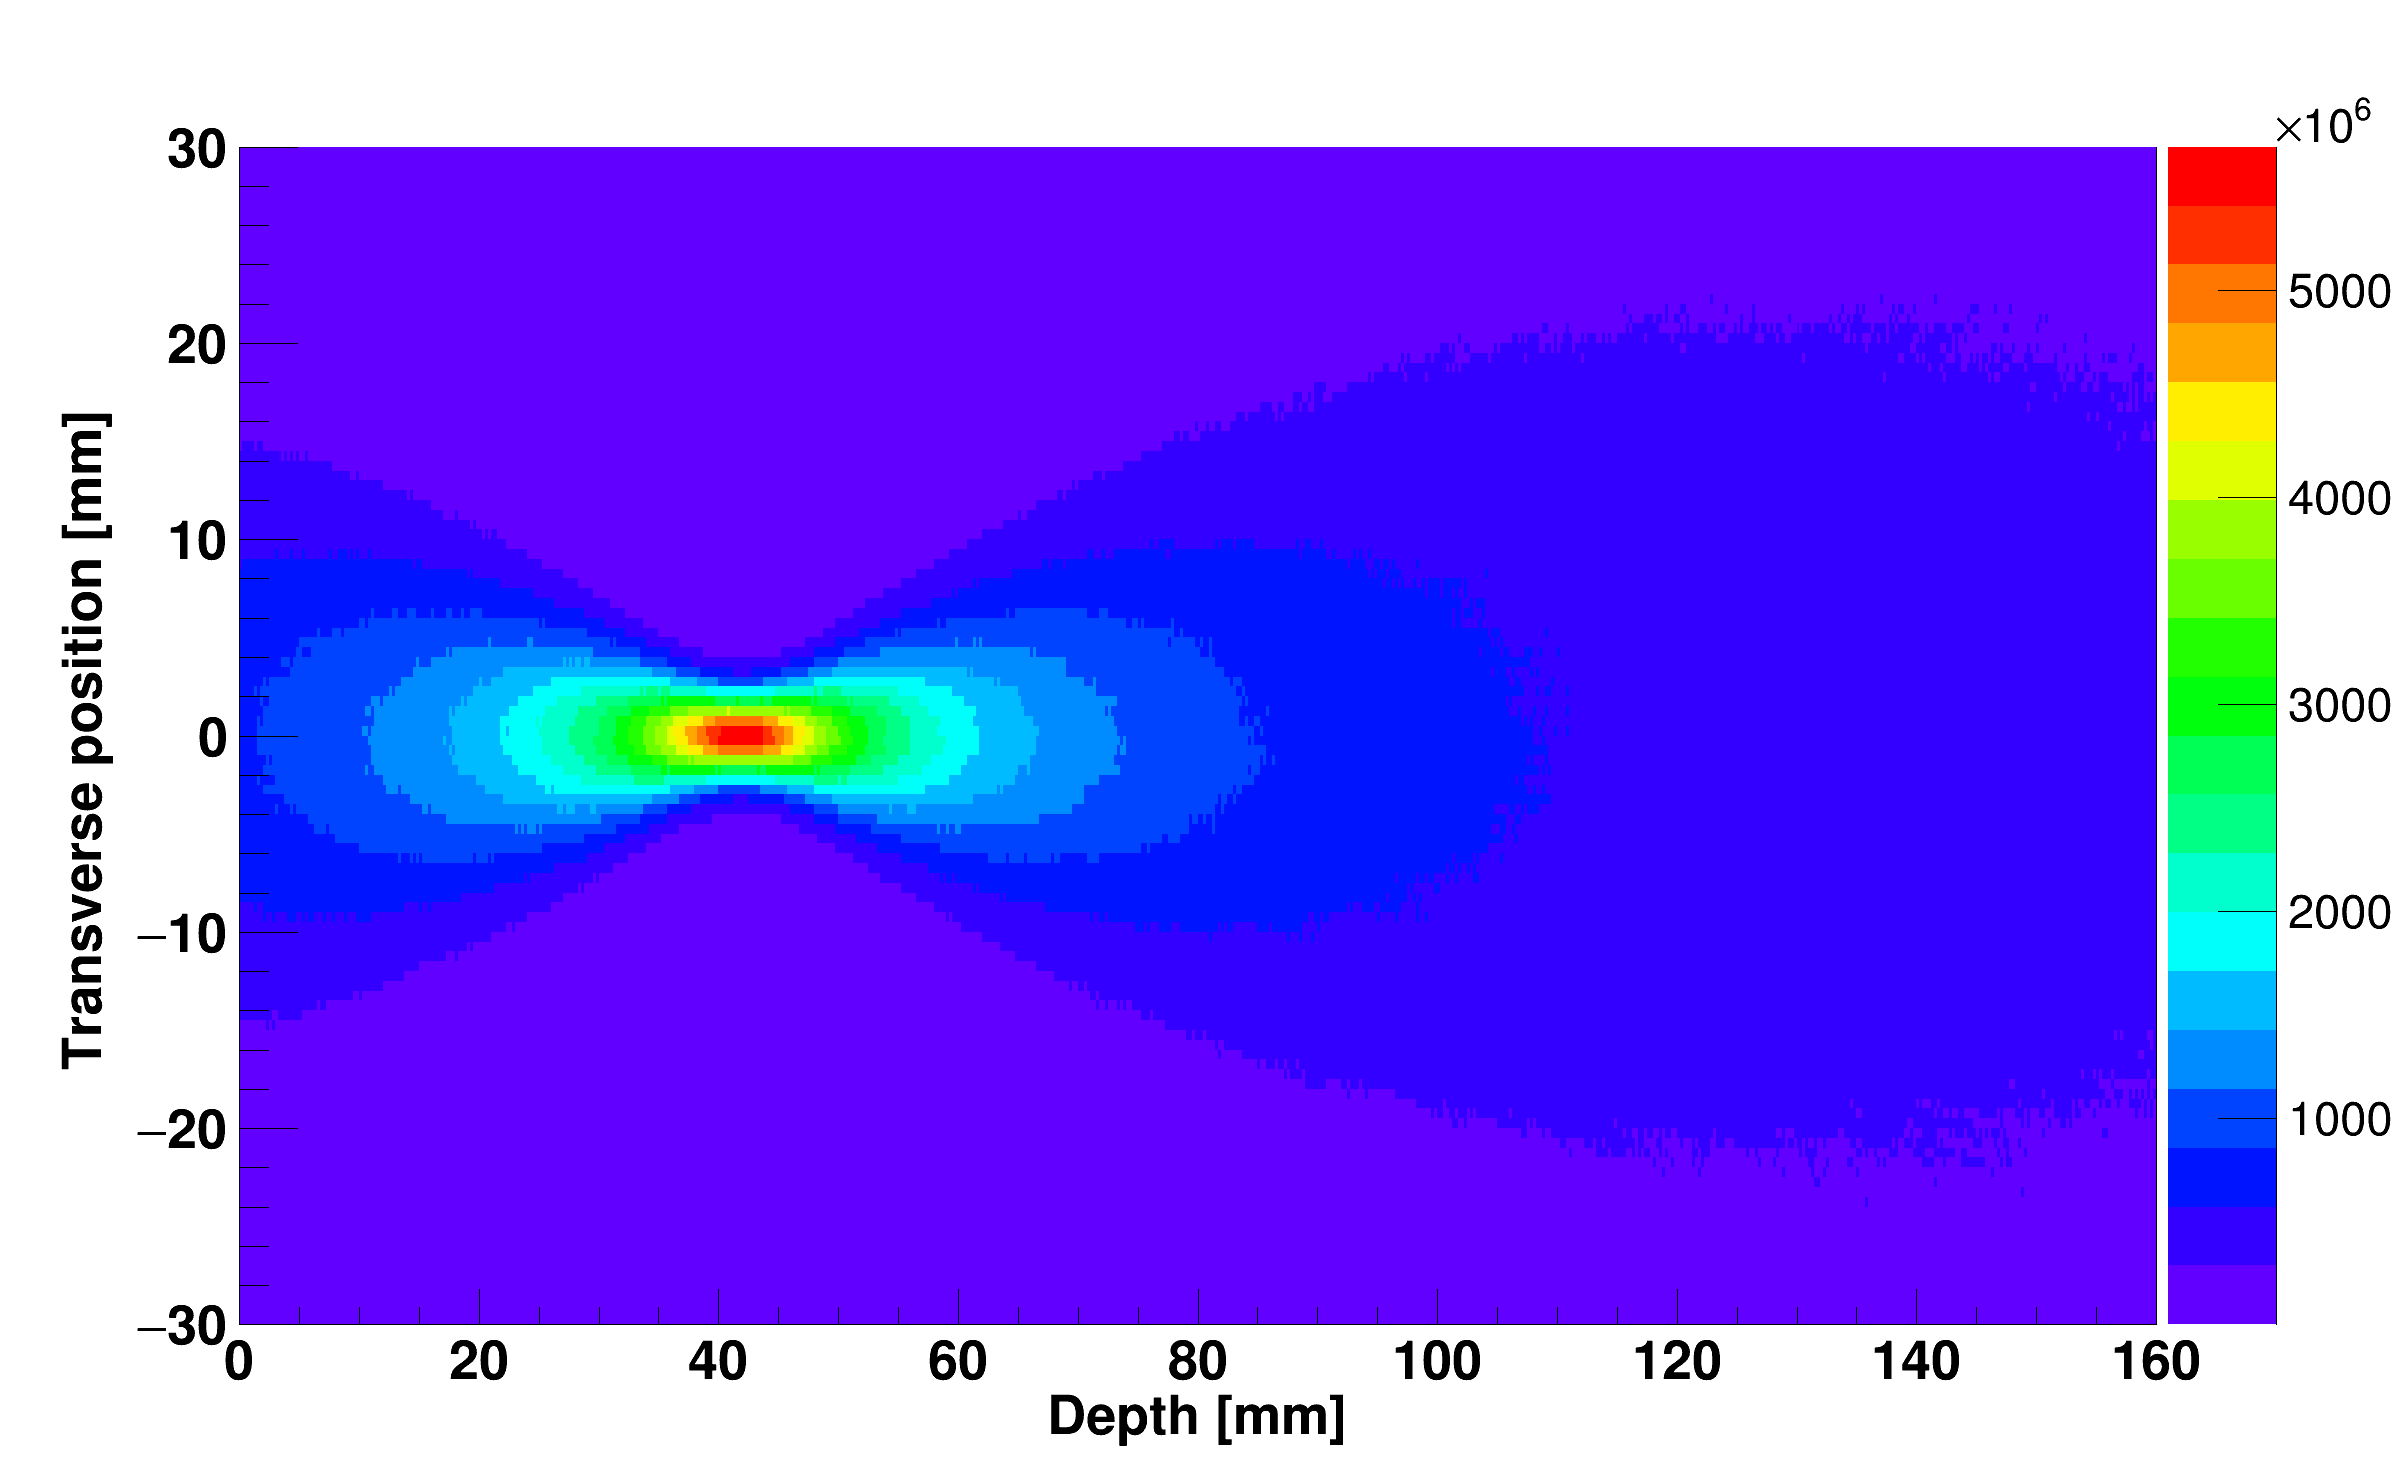

In [269]:

DataFile = ROOT.TFile("/home/fardousr/Desktop/Output/Energy_350_Alpha:_7.0_Beta:_300.0mm_Sigma_10.mm.root")
hist = DataFile.Get('ProtonEnergyHisto').Project3D("yz")

can1 = TCanvas( 'c1', 'Deterministic LET', 200, 10, 2400, 1500)
can1.SetFillColor( 0 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
hist.GetXaxis().SetTitle("Depth [mm]");
hist.GetYaxis().SetTitle("Transverse position [mm]");
hist.Draw()
hist.GetXaxis().CenterTitle();
hist.GetYaxis().CenterTitle();
hist.GetXaxis().SetRangeUser(0, 160);
hist.GetYaxis().SetRangeUser(-30, 30);
hist.SetStats(0)
hist.SetTitle("")
hist.Draw("COLZ")
gStyle.SetPalette(1)
can1.Modified()
can1.Update()
can1.Draw()
can1.Print("Distribution of Energy Deposition 350MeV Alpha:7.0 Beta:_300.0mm Sigma_10.mm.png");

 FCN=120083 FROM HESSE     STATUS=OK             16 CALLS          99 TOTAL
                     EDM=6.49617e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.34567e+11   5.53550e+07   3.20834e+04  -1.70350e-11
   2  Mean        -2.65302e-04   5.51572e-04   1.86652e-05   1.18468e-01
   3  Sigma        1.57998e+00   4.85218e-04   2.30687e-06  -1.66842e+01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file Energy350_Target_Point_Alpha_7_.png has been created


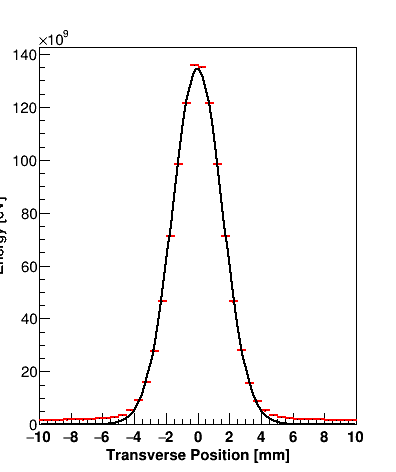

In [273]:
c1 = TCanvas( 'c1', 'c1', 400, 500 )
DataFile = ROOT.TFile("/home/fardousr/Desktop/Output/Energy_350_Alpha:_7.0_Beta:_300.0mm_Sigma_10.mm.root")
Energy_X = DataFile.Get('ProtonEnergyHisto').ProjectionX("X",0,200, 156, 180 )
Energy_X.GetXaxis().SetRangeUser(-10, 10);
Energy_X.Fit("gaus", "M", "SAME")
Energy_X.Draw("SAME")
Energy_X.SetLineColor(1)
Energy_X.SetLineWidth(2)
Energy_X.GetXaxis().CenterTitle();
Energy_X.GetYaxis().CenterTitle();
Energy_X.GetXaxis().SetLabelSize(.04)
Energy_X.GetYaxis().SetLabelSize(.04)
Energy_X.GetXaxis().SetTitleSize(.04)
Energy_X.GetYaxis().SetTitleSize(.04)
Energy_X.SetLineColor(2)
Energy_X.SetTitle("")
Energy_X.GetXaxis().SetTitle("Transverse Position [mm]")
Energy_X.GetYaxis().SetTitle("Energy [eV]");
Energy_X.SetStats(0)
Energy_X.GetFunction("gaus").SetLineColor(1)
c1.Update()
c1.Print("Energy350_Target_Point_Alpha_7_.png")
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file Radial Energy Deposition 350MeV Alpha:7.0 Beta:_300.0mm Sigma_10.mm.png has been created


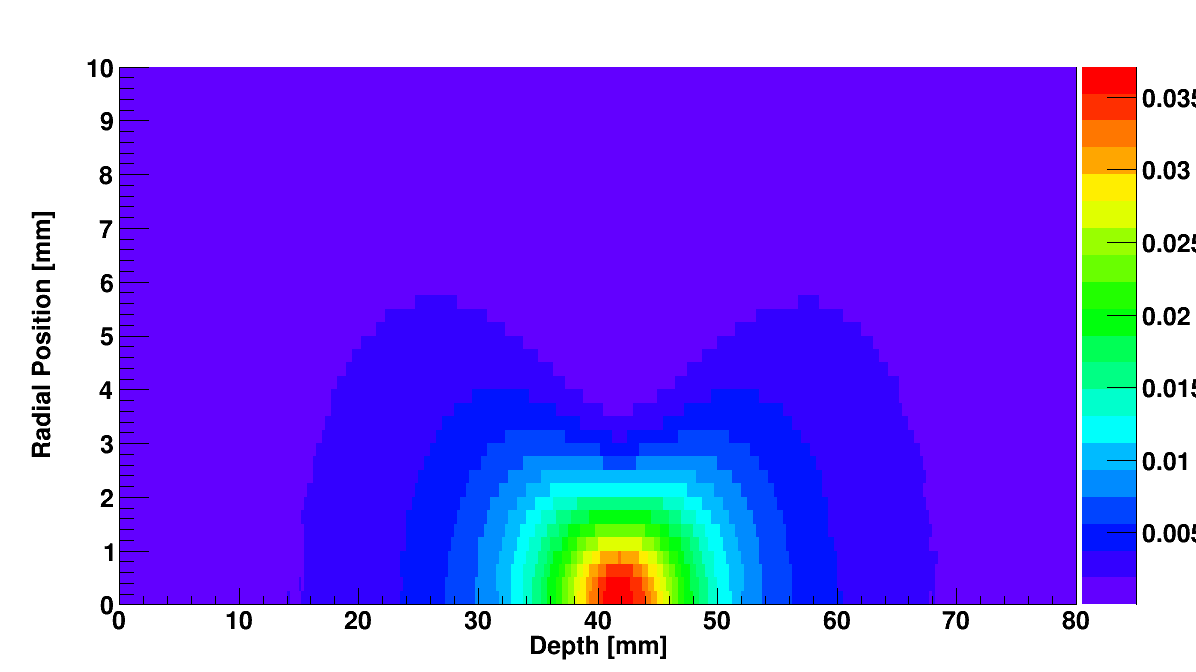

In [270]:
DataFile = ROOT.TFile("/home/fardousr/Desktop/Output/Convergent_Data/Energy_350_Alpha:_7.0_Beta:_300.0mm_Sigma_10.mm.root")
hist = DataFile.Get('ProtonRadialHisto')

hist = DataFile.Get('ProtonRadialHisto').Clone()
hist.SetDirectory(0)
for i in range (1, 201):
    for j in range (1, 801):
        x = hist.GetBinContent(j,i)#*1.60218e-19
        mass = mt.pi*((0.25*i)**2-(0.25*(i-1))**2)*0.25*997
        hist.SetBinContent(j,i,x/mass*1e-9)
        
can1 = TCanvas( 'c1', 'Deterministic LET', 80, 10, 1200, 700)
can1.SetFillColor( 0)
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
hist.GetXaxis().SetTitle("Depth [mm]");
hist.GetYaxis().SetTitle("Radial Position [mm]");
hist.Draw()
hist.GetXaxis().CenterTitle();
hist.GetYaxis().CenterTitle();
hist.GetXaxis().SetRangeUser(0, 80);
hist.GetYaxis().SetRangeUser(0, 10);
hist.SetTitle("")
hist.SetStats(0)
hist.Draw("COLZ")
gStyle.SetPalette(1)
can1.Modified()
can1.Update()
can1.Draw()
can1.Print("Radial Energy Deposition 350MeV Alpha:7.0 Beta:_300.0mm Sigma_10.mm.png")

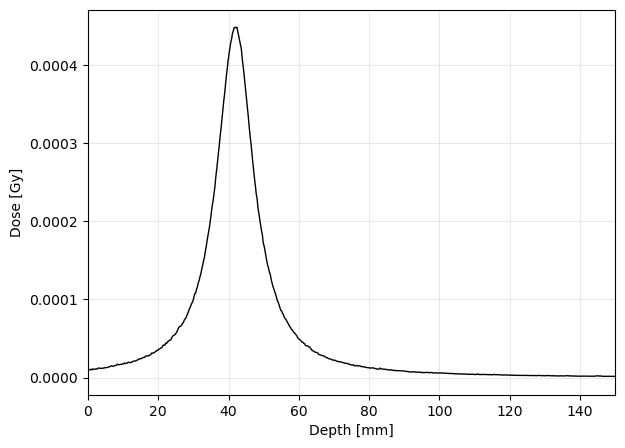

In [232]:
from pylab import rcParams
plt.rcdefaults()
rcParams['figure.figsize'] = 6.8, 5
plt.rcParams['axes.facecolor'] = 'white'

DataFile    = ROOT.TFile("/home/fardousr/Desktop/Output/Energy_350_Alpha:_7.0_Beta:_300.0mm_Sigma_10.mm.root")
radiusBinMax = 1
radius       = 1
lenght = 1/1000       #m
mass = mt.pi*(radius/1000)**2*lenght*997 #kg/m3 

EnergyHisto = DataFile.Get('ProtonRadialHisto').ProjectionX("X", 1, radiusBinMax)
Dose     = array( 'd' )
Depth    = array( 'd' )

for i in range(1, 1001):
    EnergyDeposit = EnergyHisto.GetBinContent(i)*1.60218*10**-19  #J
    Dose.append(EnergyDeposit/mass)
    Depth.append(EnergyHisto.GetXaxis().GetBinCenter(i)) 
#lineLegend = "r = "+str(r[j])+"mm" 
plt.plot(Depth, Dose, color='black', linestyle='-', linewidth=1)
plt.grid(alpha =0.25, axis='both' , color='gray', linestyle='-', linewidth=.5)
#plt.legend(loc='upper right')
plt.xlim(0,150)
plt.xlabel("Depth [mm]")
plt.ylabel("Dose [Gy]")
plt.savefig("High energy dose.png", dpi = 400)
plt.show()

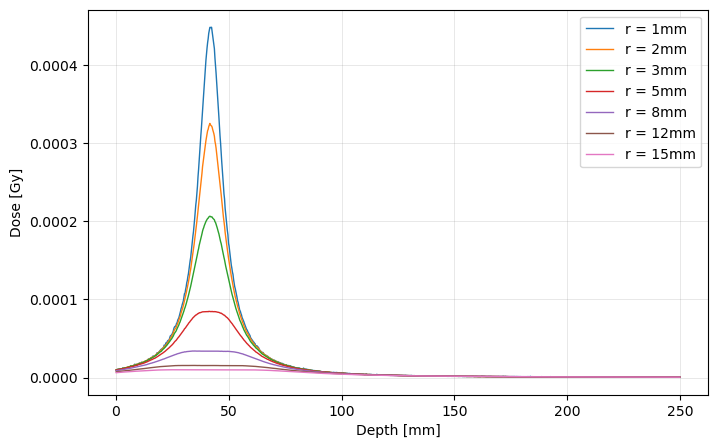

In [183]:
from pylab import rcParams
plt.rcdefaults()
rcParams['figure.figsize'] = 8, 5
plt.rcParams['axes.facecolor'] = 'white'

DataFile    = ROOT.TFile("/home/fardousr/Desktop/Output/Energy_350_Alpha:_7.0_Beta:_300.0mm_Sigma_10.mm.root")
r = [1, 2, 3, 5, 8, 12, 15]

for j in range (len(r)): 
    radius       = r[j]     #mm
    radiusBinMax = int(radius)
    lenght = 1/1000       #m
    mass = mt.pi*(radius/1000)**2*lenght*997 #kg/m3 

    EnergyHisto = DataFile.Get('ProtonRadialHisto').ProjectionX("X", 1, radiusBinMax)

    Dose     = array( 'd' )
    Depth    = array( 'd' )

    for i in range(1, 1001):
        EnergyDeposit = EnergyHisto.GetBinContent(i)*1.60218*10**-19  #J
        Dose.append(EnergyDeposit/mass)
        Depth.append(EnergyHisto.GetXaxis().GetBinCenter(i)) 
    lineLegend = "r = "+str(r[j])+"mm" 
    plt.plot(Depth, Dose, label = lineLegend, linewidth=1)
    plt.grid(alpha =0.25, axis='both' , color='gray', linestyle='-', linewidth=.5)
    plt.legend(loc='upper right')
    plt.xlabel("Depth [mm]")
    plt.ylabel("Dose [Gy]")
plt.savefig("DoseFromRZData_Alpha_7.png", dpi = 500)

plt.show()

 FCN=82725.9 FROM HESSE     STATUS=OK             16 CALLS          99 TOTAL
                     EDM=7.67283e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     9.23763e+10   4.61297e+07   2.20242e+04  -2.24576e-11
   2  Mean        -1.17626e-03   6.62263e-04   1.86009e-05   2.47748e-01
   3  Sigma        1.56444e+00   5.81101e-04   2.30704e-06  -1.49198e+01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file Energy_Target_Point_Alpha_7_.png has been created


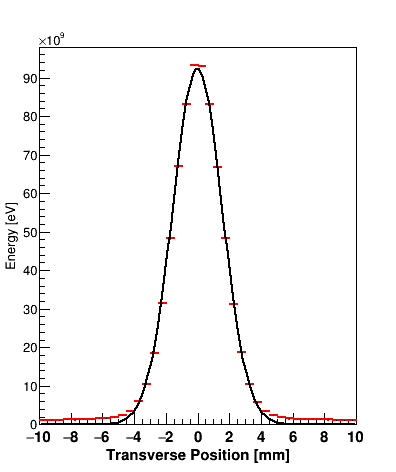

In [219]:
c1 = TCanvas( 'c1', 'c1', 400, 500 )
DataFile = ROOT.TFile("/home/fardousr/Desktop/Output/Energy_350_Alpha:_7.0_Beta:_300.0mm_Sigma_10.mm.root")
Energy_X = DataFile.Get('ProtonEnergyHisto').ProjectionX("X",0,200, 164, 180 )
Energy_X.GetXaxis().SetRangeUser(-10, 10);
Energy_X.Fit("gaus", "M", "SAME")
Energy_X.Draw("SAME")
Energy_X.SetLineColor(1)
Energy_X.SetLineWidth(2)
Energy_X.GetXaxis().CenterTitle();
Energy_X.GetYaxis().CenterTitle();
Energy_X.SetLineColor(2)
Energy_X.SetTitle("")
Energy_X.GetXaxis().SetTitle("Transverse Position [mm]")
Energy_X.GetYaxis().SetTitle("Energy [eV]");
Energy_X.SetStats(0)
Energy_X.GetFunction("gaus").SetLineColor(1)
c1.Update()
c1.Print("Energy_Target_Point_Alpha_7_.png")
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


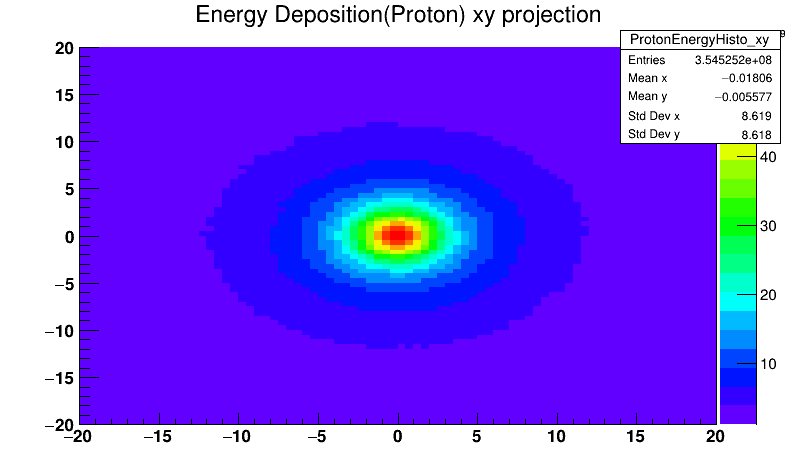

In [16]:
c1 = TCanvas( 'c1', 'c1', 800, 500 )
DataFile = ROOT.TFile("/home/fardousr/Desktop/Output/Energy_350_Alpha:_7.0_Beta:_300.0mm_Sigma_10.mm.root")
Energy_X = DataFile.Get('ProtonEnergyHisto').Project3D("xy")
Energy_X.GetXaxis().SetRangeUser(-20, 20);
Energy_X.GetYaxis().SetRangeUser(-20, 20);
Energy_X.Draw("COLZ")
gStyle.SetPalette(1)
c1.Update()
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file Energy_Target_Point_Alpha_7_Transverse.png has been created


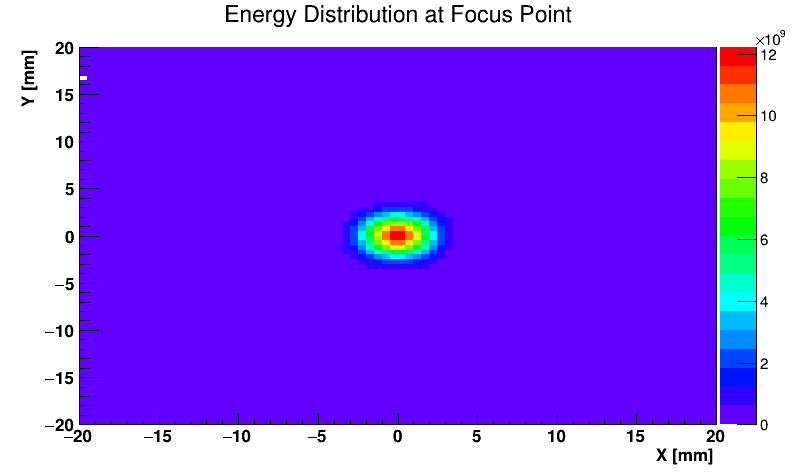

In [18]:
c1 = TCanvas( 'c1', 'c1', 800, 500 )
DataFile = ROOT.TFile("/home/fardousr/Desktop/Output/Energy_350_Alpha:_7.0_Beta:_300.0mm_Sigma_10.mm.root")
Energy_X = DataFile.Get('ProtonEnergyHisto')
Energy_X.GetZaxis().SetRange(164,180)
Energy = Energy_X.Project3D("xy")
Energy.GetXaxis().SetRangeUser(-20, 20);
Energy.GetYaxis().SetRangeUser(-20, 20);
Energy.Draw("COLZ")
Energy.SetTitle("Energy Distribution at Focus Point")
Energy.GetXaxis().SetTitle("X [mm]")
Energy.GetYaxis().SetTitle("Y [mm]")
Energy.SetStats(0)
gStyle.SetPalette(1)
c1.Update()
c1.Print("Energy_Target_Point_Alpha_7_Transverse.png")
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file ALpha14Beat800.png has been created


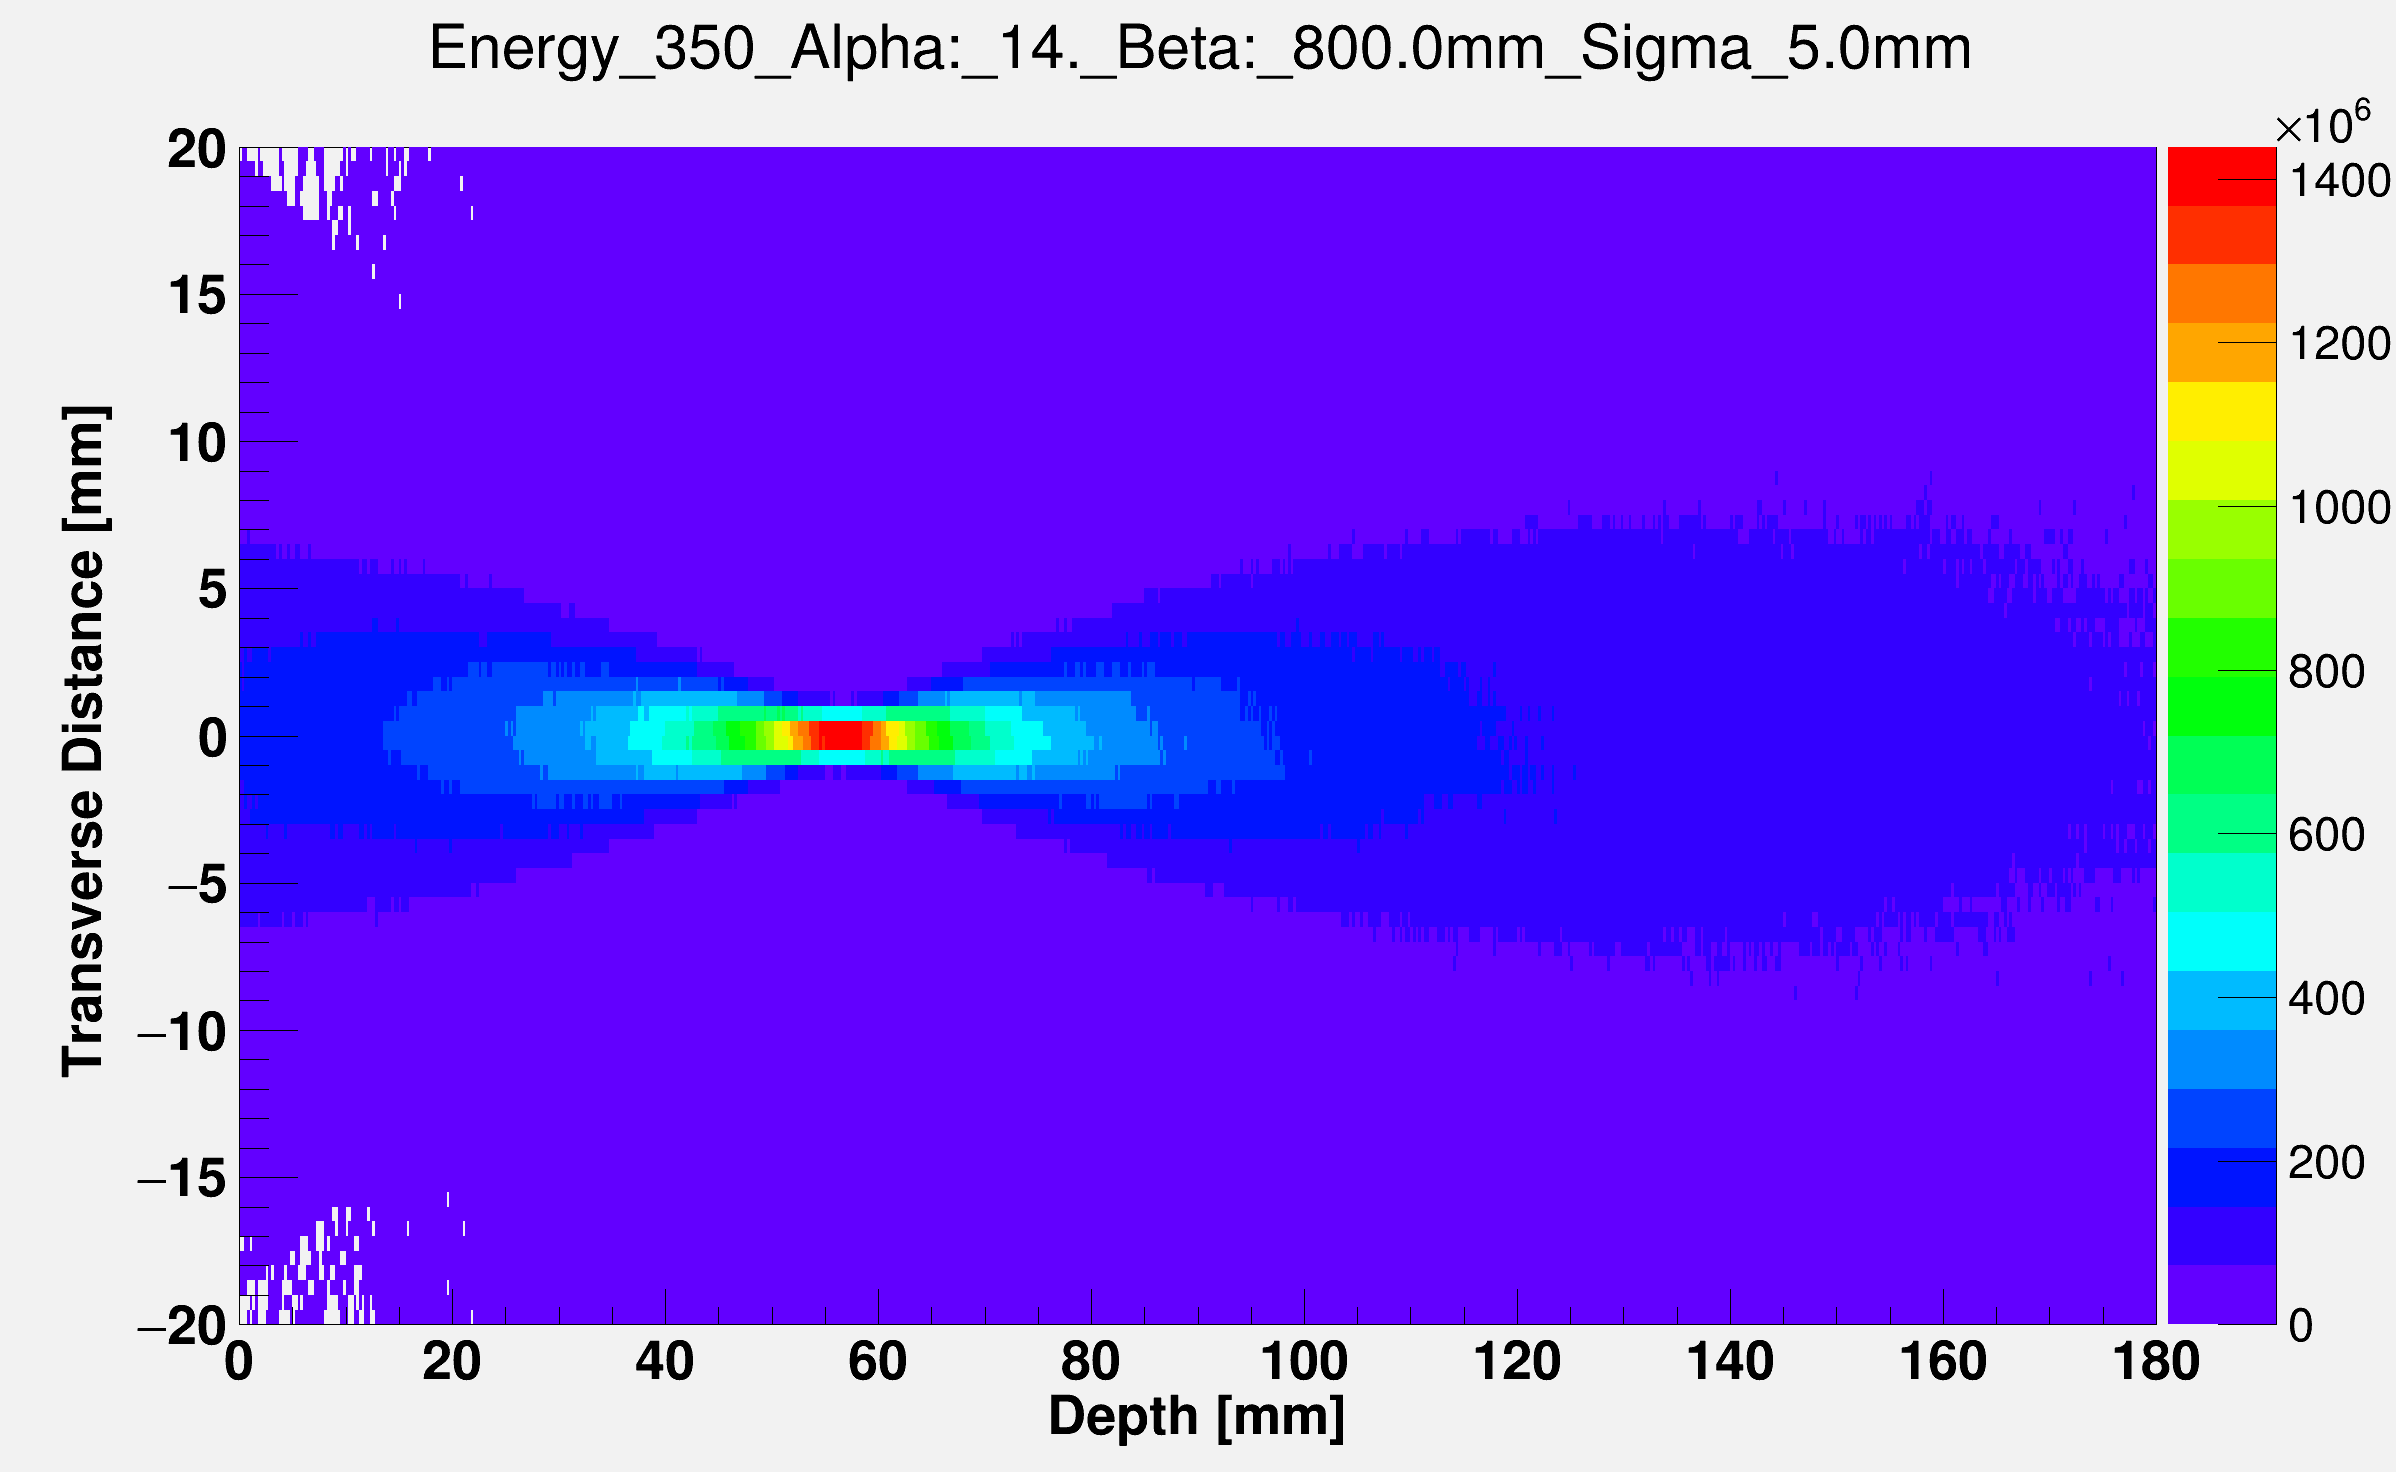

In [213]:
DataFile = ROOT.TFile("/home/fardousr/Desktop/Output/Energy_350_Alpha:_14._Beta:_800.0mm_Sigma_5.0mm.root")
hist = DataFile.Get('ProtonEnergyHisto').Project3D("yz")

can1 = TCanvas( 'c1', 'Deterministic LET', 200, 10, 2400, 1500)
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
hist.GetXaxis().SetTitle("Depth [mm]");
hist.GetYaxis().SetTitle("Energy [eV]");
hist.Draw()
hist.GetXaxis().CenterTitle();
hist.GetYaxis().CenterTitle();
hist.GetXaxis().SetRangeUser(0, 180);
hist.GetYaxis().SetRangeUser(-20, 20);
hist.SetTitle("Energy_350_Alpha:_14._Beta:_800.0mm_Sigma_5.0mm")
hist.GetXaxis().SetTitle("Depth [mm]")
hist.GetYaxis().SetTitle("Transverse Distance [mm]");
hist.Draw("COLZ")
gStyle.SetPalette(1)
hist.SetStats(0)
can1.Modified()
can1.Update()
can1.Print("ALpha14Beat800.png")
can1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


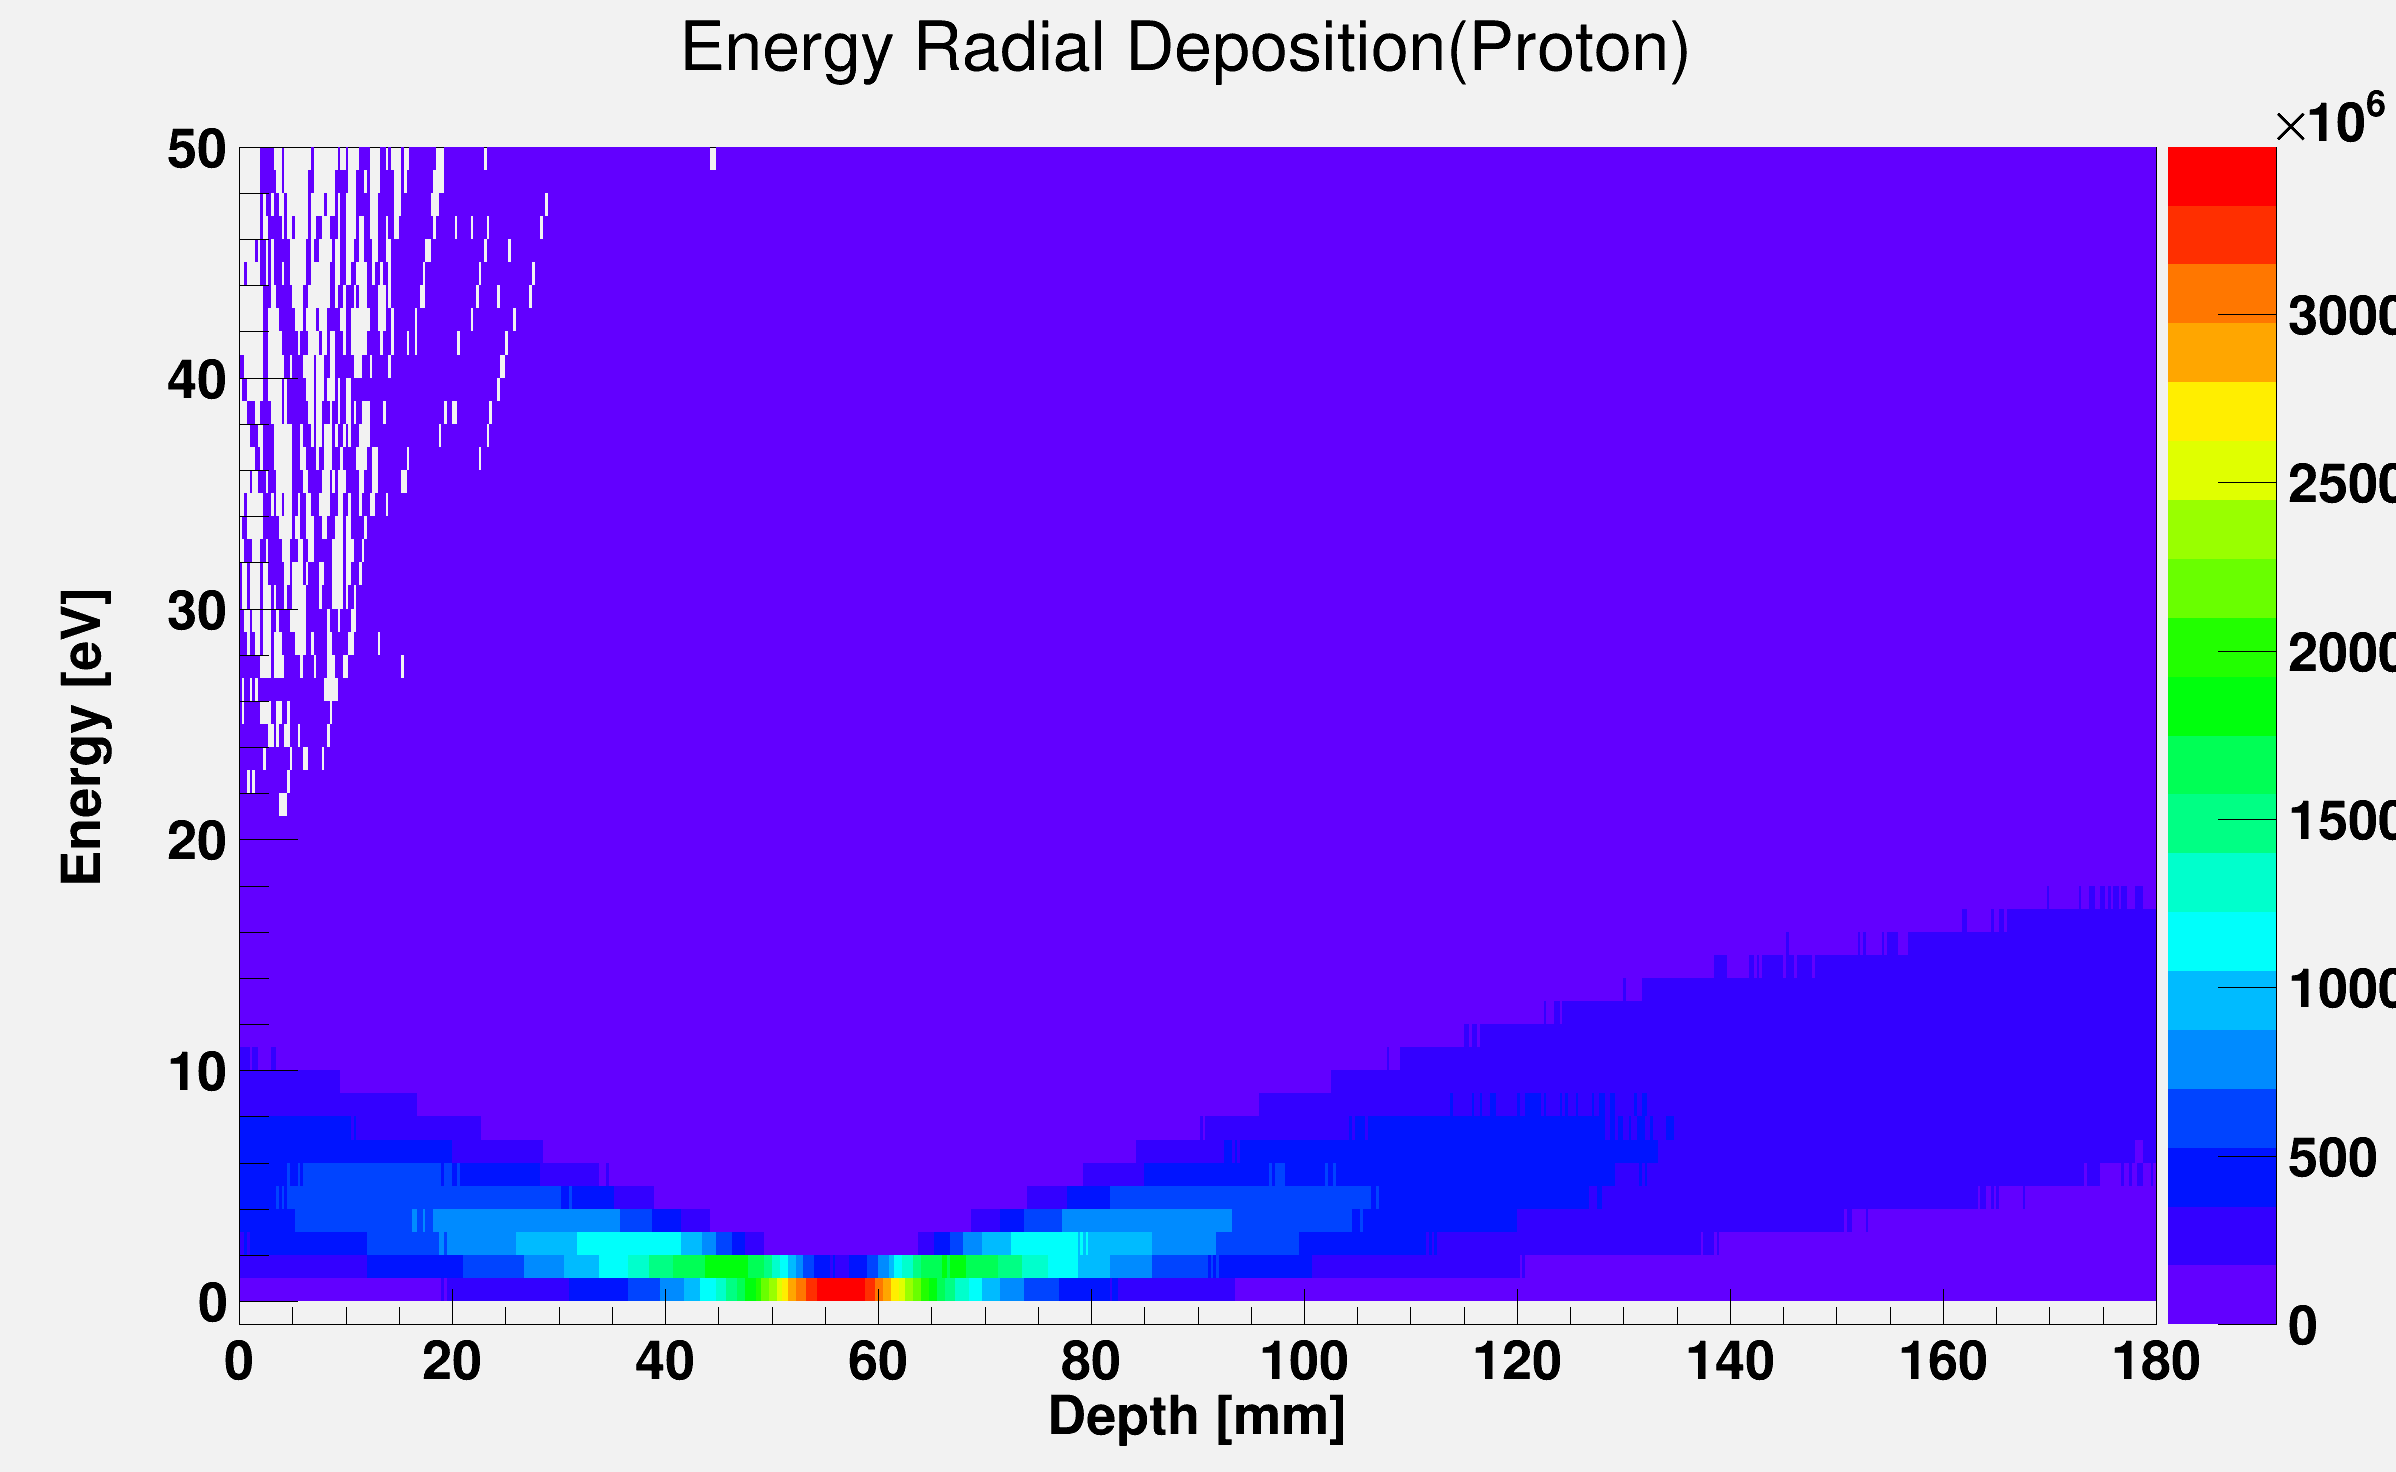

In [99]:
DataFile = ROOT.TFile("/home/fardousr/Desktop/Output/Energy_350_Alpha:_14._Beta:_800.0mm_Sigma_5.0mm.root")
hist = DataFile.Get('ProtonRadialHisto')

can1 = TCanvas( 'c1', 'Deterministic LET', 200, 10, 2400, 1500)
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
hist.GetXaxis().SetTitle("Depth [mm]");
hist.GetYaxis().SetTitle("Energy [eV]");
hist.Draw()
hist.GetXaxis().CenterTitle();
hist.GetYaxis().CenterTitle();
hist.GetXaxis().SetRangeUser(0, 180);
hist.GetYaxis().SetRangeUser(-50, 50);
hist.Draw("COLZ")
gStyle.SetPalette(1)
hist.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()

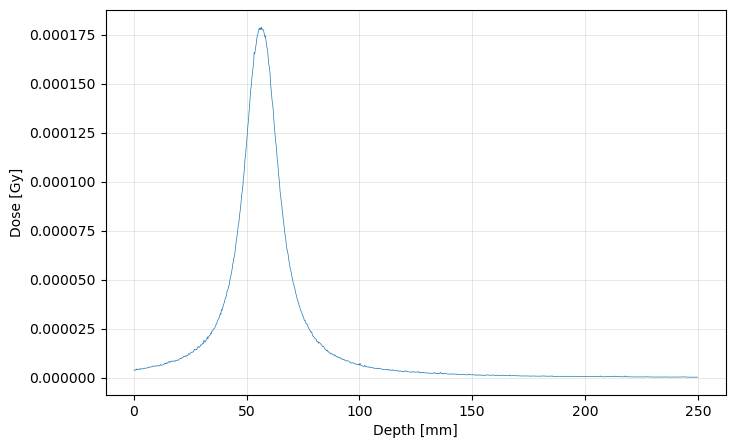

In [8]:
DataFile = ROOT.TFile("/home/fardousr/Desktop/Output/Energy_350_Alpha:_14._Beta:_800.0mm_Sigma_5.0mm.root")
radiusBinMax = 1
radius       = 1 
lenght = 1/1000       #m
mass = mt.pi*(radius/1000)**2*lenght*997 #kg/m3 

EnergyHisto = DataFile.Get('ProtonRadialHisto').ProjectionX("X", 1, radiusBinMax)
Dose     = array( 'd' )
Depth    = array( 'd' )

for i in range(1, 1001):
    EnergyDeposit = EnergyHisto.GetBinContent(i)*1.60218*10**-19  #J
    Dose.append(EnergyDeposit/mass)
    Depth.append(EnergyHisto.GetXaxis().GetBinCenter(i)) 
#lineLegend = "r = "+str(r[j])+"mm" 
plt.plot(Depth, Dose, label = lineLegend, linewidth=.5)
plt.grid(alpha =0.25, axis='both' , color='gray', linestyle='-', linewidth=.5)
#plt.legend(loc='upper right')
plt.xlabel("Depth [mm]")
plt.ylabel("Dose [Gy]")
plt.show()

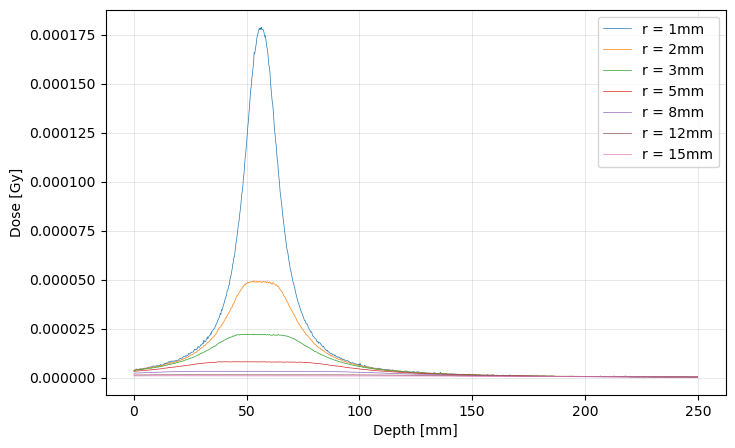

In [9]:
from pylab import rcParams
plt.rcdefaults()
rcParams['figure.figsize'] = 8, 5
plt.rcParams['axes.facecolor'] = 'white'

DataFile    = ROOT.TFile("/home/fardousr/Desktop/Output/Energy_350_Alpha:_14._Beta:_800.0mm_Sigma_5.0mm.root")
r = [1, 2, 3, 5, 8, 12, 15]

for j in range (len(r)): 
    radius       = r[j]     #mm
    radiusBinMax = int(radius)
    lenght = 1/1000       #m
    mass = mt.pi*(radius/1000)**2*lenght*997 #kg/m3 

    EnergyHisto = DataFile.Get('ProtonRadialHisto').ProjectionX("X", 1, radiusBinMax)

    Dose     = array( 'd' )
    Depth    = array( 'd' )

    for i in range(1, 1001):
        EnergyDeposit = EnergyHisto.GetBinContent(i)*1.60218*10**-19  #J
        Dose.append(EnergyDeposit/mass)
        Depth.append(EnergyHisto.GetXaxis().GetBinCenter(i)) 
    lineLegend = "r = "+str(r[j])+"mm" 
    plt.plot(Depth, Dose, label = lineLegend, linewidth=.5)
    plt.grid(alpha =0.25, axis='both' , color='gray', linestyle='-', linewidth=.5)
    plt.legend(loc='upper right')
    plt.xlabel("Depth [mm]")
    plt.ylabel("Dose [Gy]")
#plt.savefig("DoseFromRZData.png", dpi = 400)
plt.show()

 FCN=41619.8 FROM HESSE     STATUS=OK             20 CALLS         127 TOTAL
                     EDM=4.14776e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.85081e+10   5.97597e+07   2.78988e+04  -6.23307e-14
   2  Mean         2.57566e-03   4.65270e-04   4.63374e-05   1.60751e-03
   3  Sigma        5.42730e-01   4.10084e-04   1.07063e-05  -7.91562e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


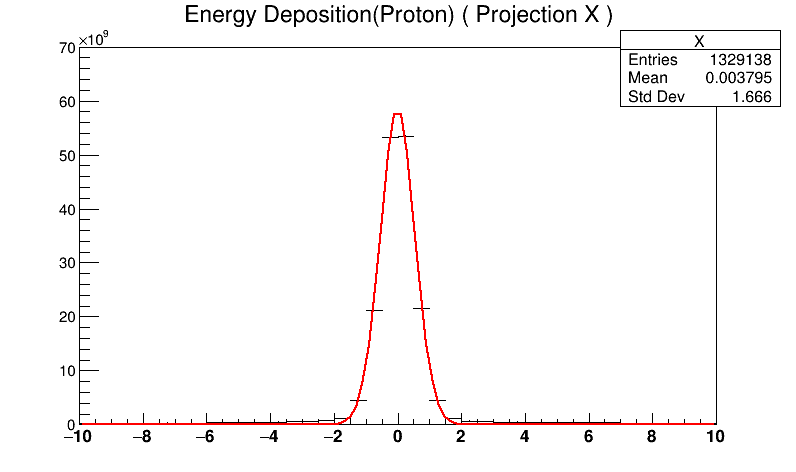

In [103]:
c1 = TCanvas( 'c1', 'c1', 800, 500 )
DataFile = ROOT.TFile("/home/fardousr/Desktop/Output/Energy_350_Alpha:_14._Beta:_800.0mm_Sigma_5.0mm.root")
Energy_X = DataFile.Get('ProtonEnergyHisto').ProjectionX("X",0,200, 208, 248 )
Energy_X.GetXaxis().SetRangeUser(-10, 10);
Energy_X.GetYaxis().SetRangeUser(0, 70*10**9);
Energy_X.Fit("gaus", "M", "SAME")
Energy_X.Draw("SAME")
c1.Update()
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


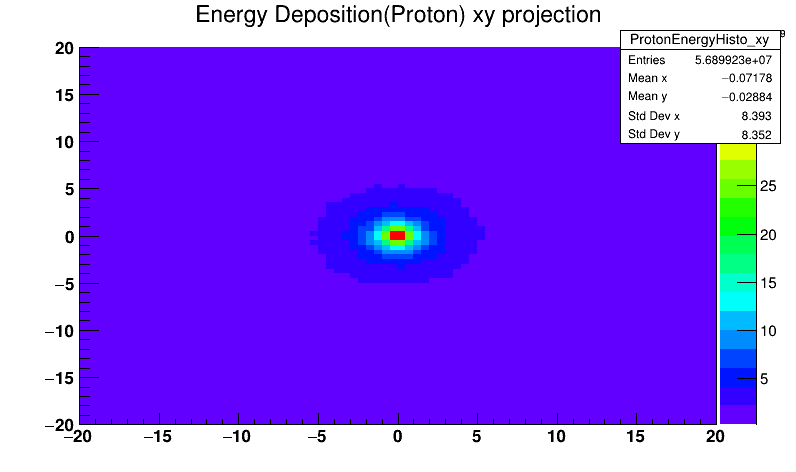

In [104]:
c1 = TCanvas( 'c1', 'c1', 800, 500 )
DataFile = ROOT.TFile("/home/fardousr/Desktop/Output/Energy_350_Alpha:_14._Beta:_800.0mm_Sigma_5.0mm.root")
Energy_X = DataFile.Get('ProtonEnergyHisto').Project3D("xy")
Energy_X.GetXaxis().SetRangeUser(-20, 20);
Energy_X.GetYaxis().SetRangeUser(-20, 20);
Energy_X.Draw("COLZ")
c1.Update()
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


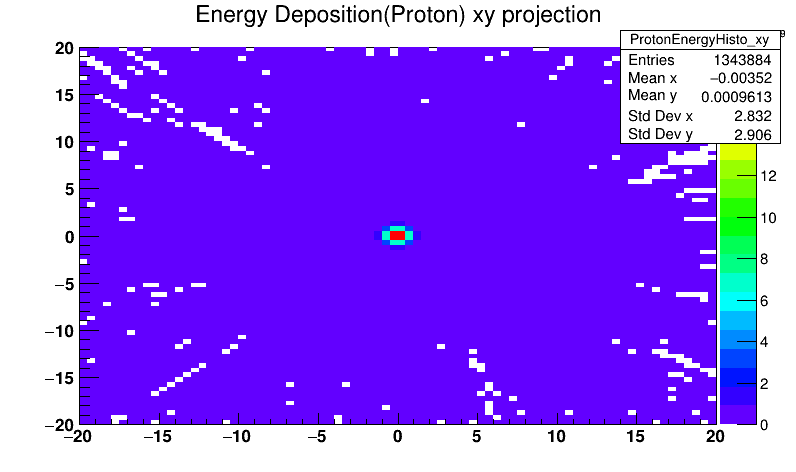

In [105]:
c1 = TCanvas( 'c1', 'c1', 800, 500 )
DataFile = ROOT.TFile("/home/fardousr/Desktop/Output/Energy_350_Alpha:_14._Beta:_800.0mm_Sigma_5.0mm.root")
Energy_X = DataFile.Get('ProtonEnergyHisto')
Energy_X.GetZaxis().SetRange(208,248)
Energy = Energy_X.Project3D("xy")
Energy.GetXaxis().SetRangeUser(-20, 20);
Energy.GetYaxis().SetRangeUser(-20, 20);
Energy.Draw("COLZ")
c1.Update()
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


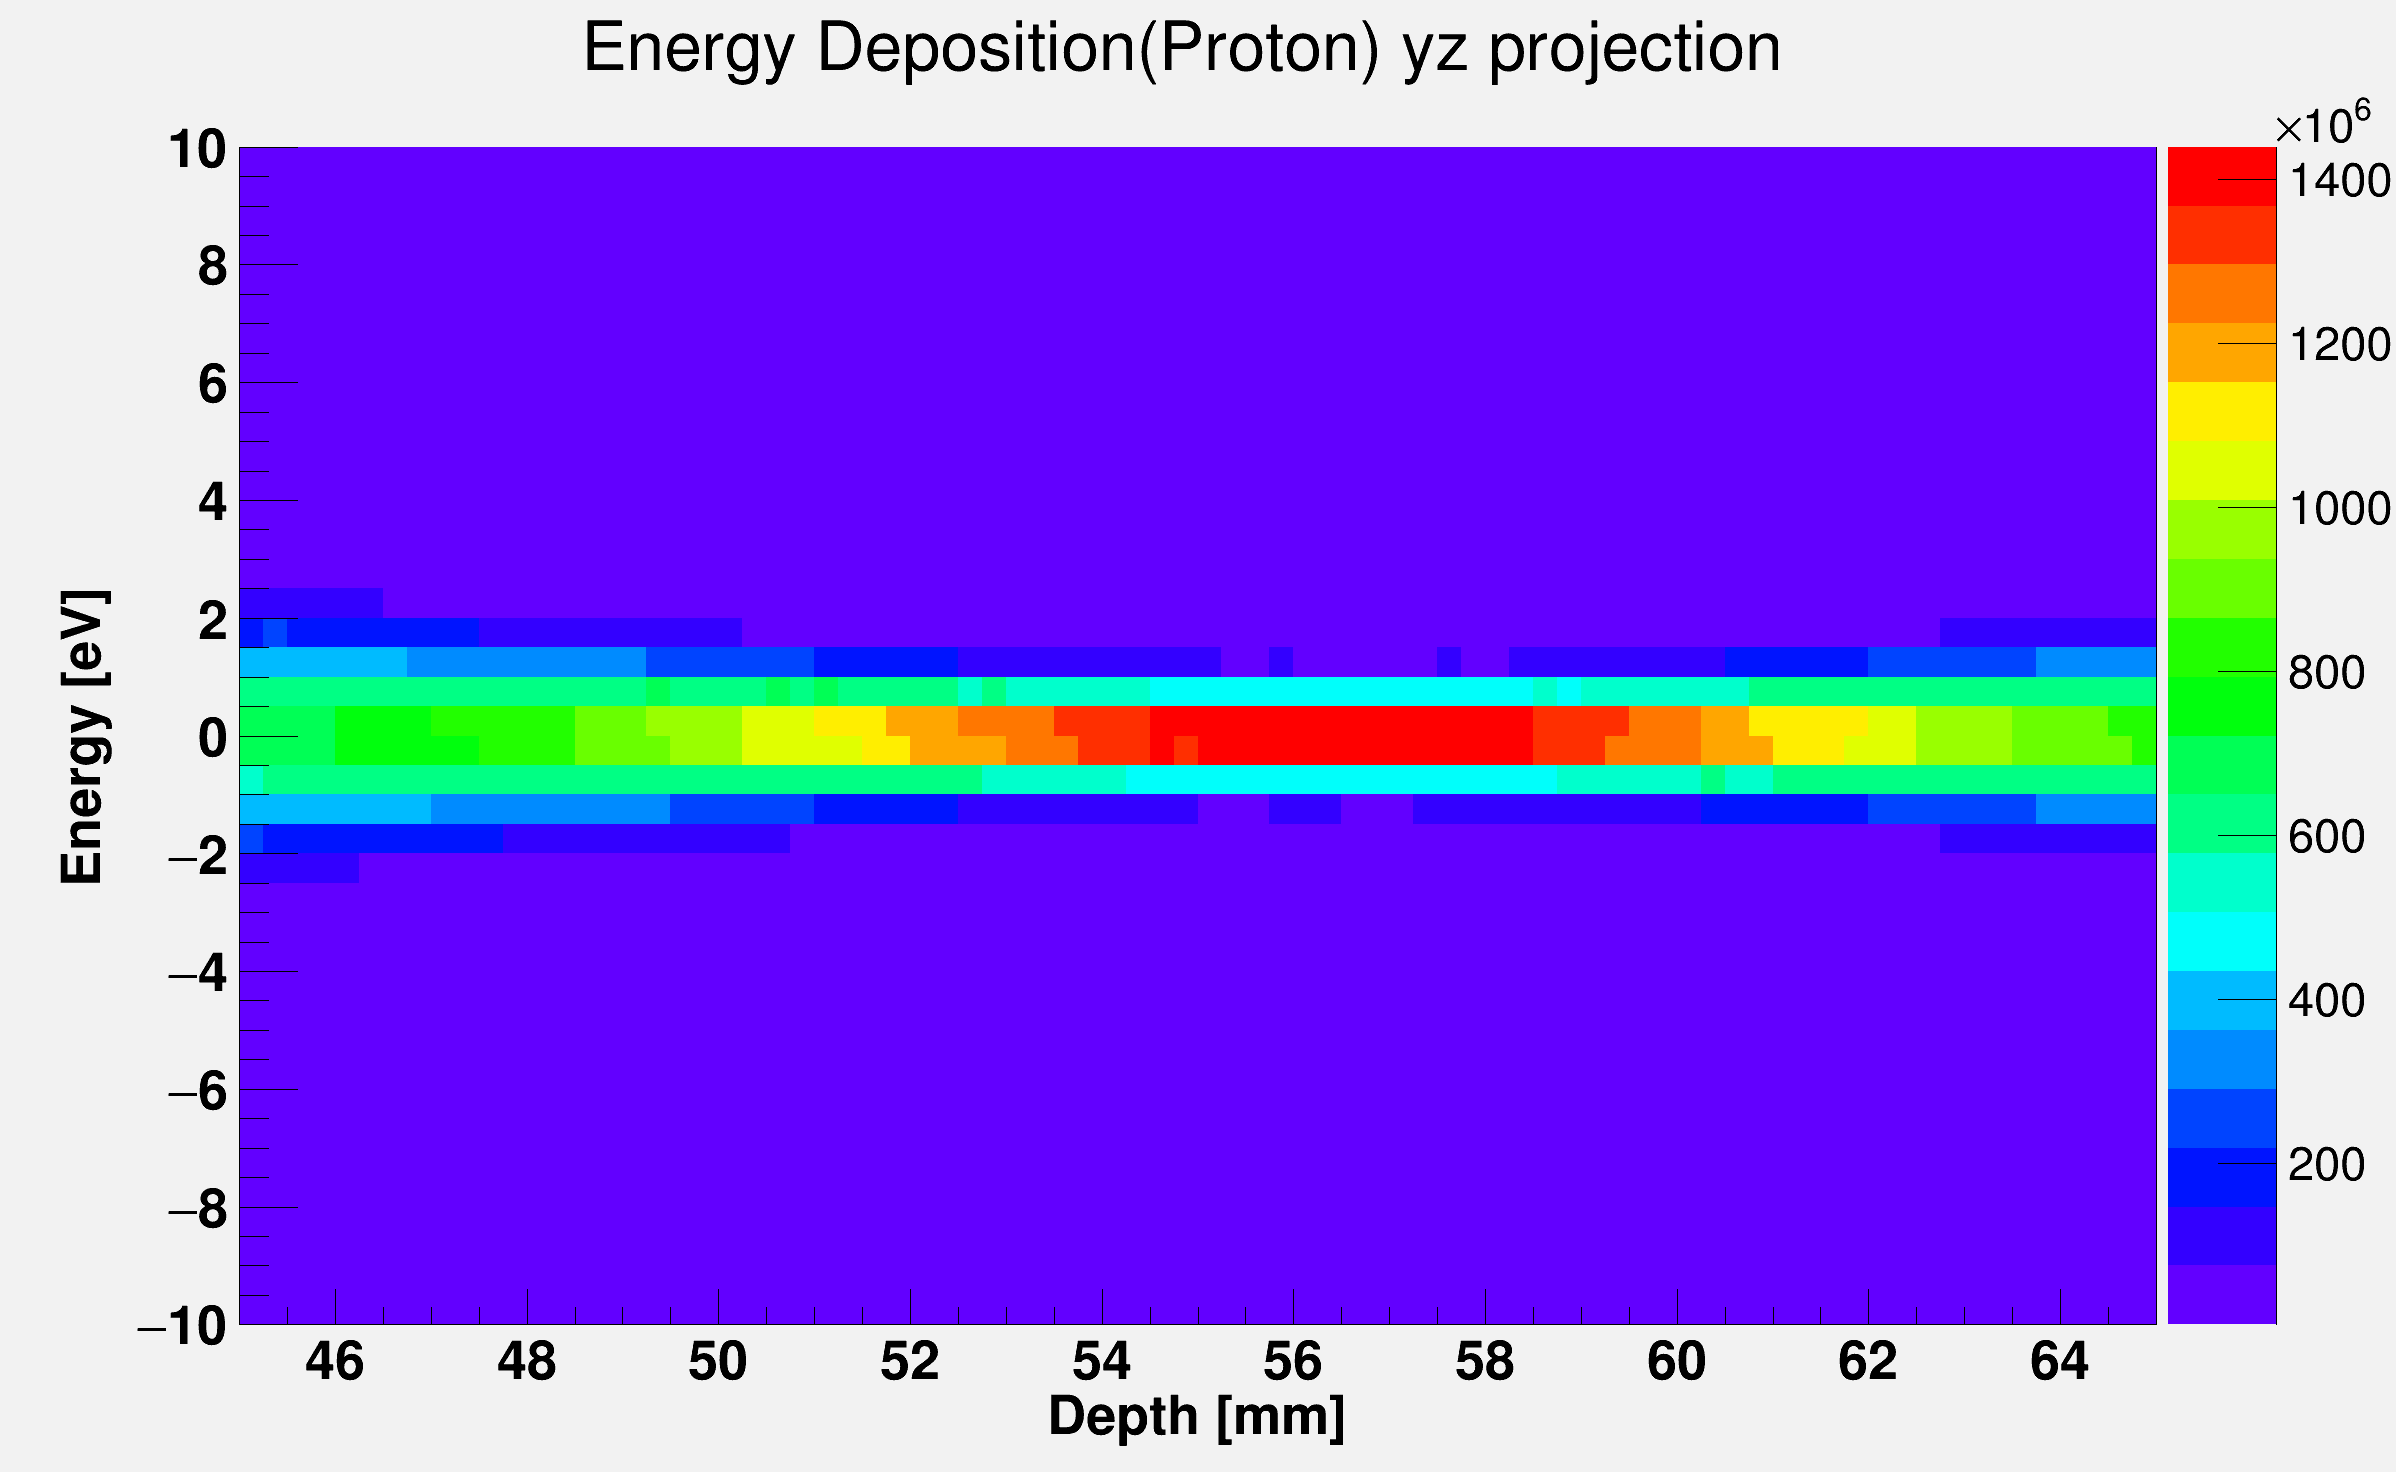

In [106]:
DataFile = ROOT.TFile("/home/fardousr/Desktop/Output/Energy_350_Alpha:_14._Beta:_800.0mm_Sigma_5.0mm.root")
hist = DataFile.Get('ProtonEnergyHisto').Project3D("yz")

can1 = TCanvas( 'c1', 'Deterministic LET', 200, 10, 2400, 1500)
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
hist.GetXaxis().SetTitle("Depth [mm]");
hist.GetYaxis().SetTitle("Energy [eV]");
hist.Draw()
hist.GetXaxis().CenterTitle();
hist.GetYaxis().CenterTitle();
hist.GetXaxis().SetRangeUser(45, 65);
hist.GetYaxis().SetRangeUser(-10, 10);
hist.Draw("COLZ")
gStyle.SetPalette(1)
hist.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()

### Read ROOT file content

In [51]:
DataFileLocation = "/home/fardousr/Desktop/Output/Convergent_Data/Radius_4mm/"
DataFileList = os.listdir(DataFileLocation)
File = pd.DataFrame(DataFileList)
print(DataFileList)
display(File)
#DataFile = ROOT.TFile(DataFileLocation+"/"+DataFileList[])

['Energy_150_Alpha:_0.0_Beta:_800.0mm_Sigma_4.0mm.root', 'Energy_150_Alpha:_3.0_Beta:_800.0mm_Sigma_4.0mm.root', 'Energy_150_Alpha:_4.0_Beta:_800.0mm_Sigma_4.0mm.root', 'Energy_150_Alpha:_5.0_Beta:_800.0mm_Sigma_4.0mm.root']


,0
0,Energy_150_Alpha:_0.0_Beta:_800.0mm_Sigma_4.0m...
1,Energy_150_Alpha:_3.0_Beta:_800.0mm_Sigma_4.0m...
2,Energy_150_Alpha:_4.0_Beta:_800.0mm_Sigma_4.0m...
3,Energy_150_Alpha:_5.0_Beta:_800.0mm_Sigma_4.0m...


In [52]:
Energy_Distribution    =  []

for i in range(0, len(DataFileList)):
    file = DataFileLocation+"/"+DataFileList[i]
    DataFile = ROOT.TFile(file)
    NumProton = DataFile.Get('ParticelCounter').GetBinContent(1)
    print(NumProton)
    Energy = DataFile.Get('ProtonEnergyHisto').Clone("Alpha_"+str(i))
    Energy.SetDirectory(0)
    name = DataFileList[i]+"_xz"
    Distribution = Energy.Project3D("xz").Clone(name)
#     RBE = RBEMatrix(file)
#     Distribution.Multiply(RBE)
    Distribution.SetDirectory(0)
    Energy_Distribution.append(Distribution)
    
print("REB Weighted Collimator beam Dose.png")

0.0
0.0
0.0
0.0
REB Weighted Collimator beam Dose.png


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cs
Info in <TCanvas::Print>: png file Energy_XZ_4mm_Radius_Alpha0to5.png has been created


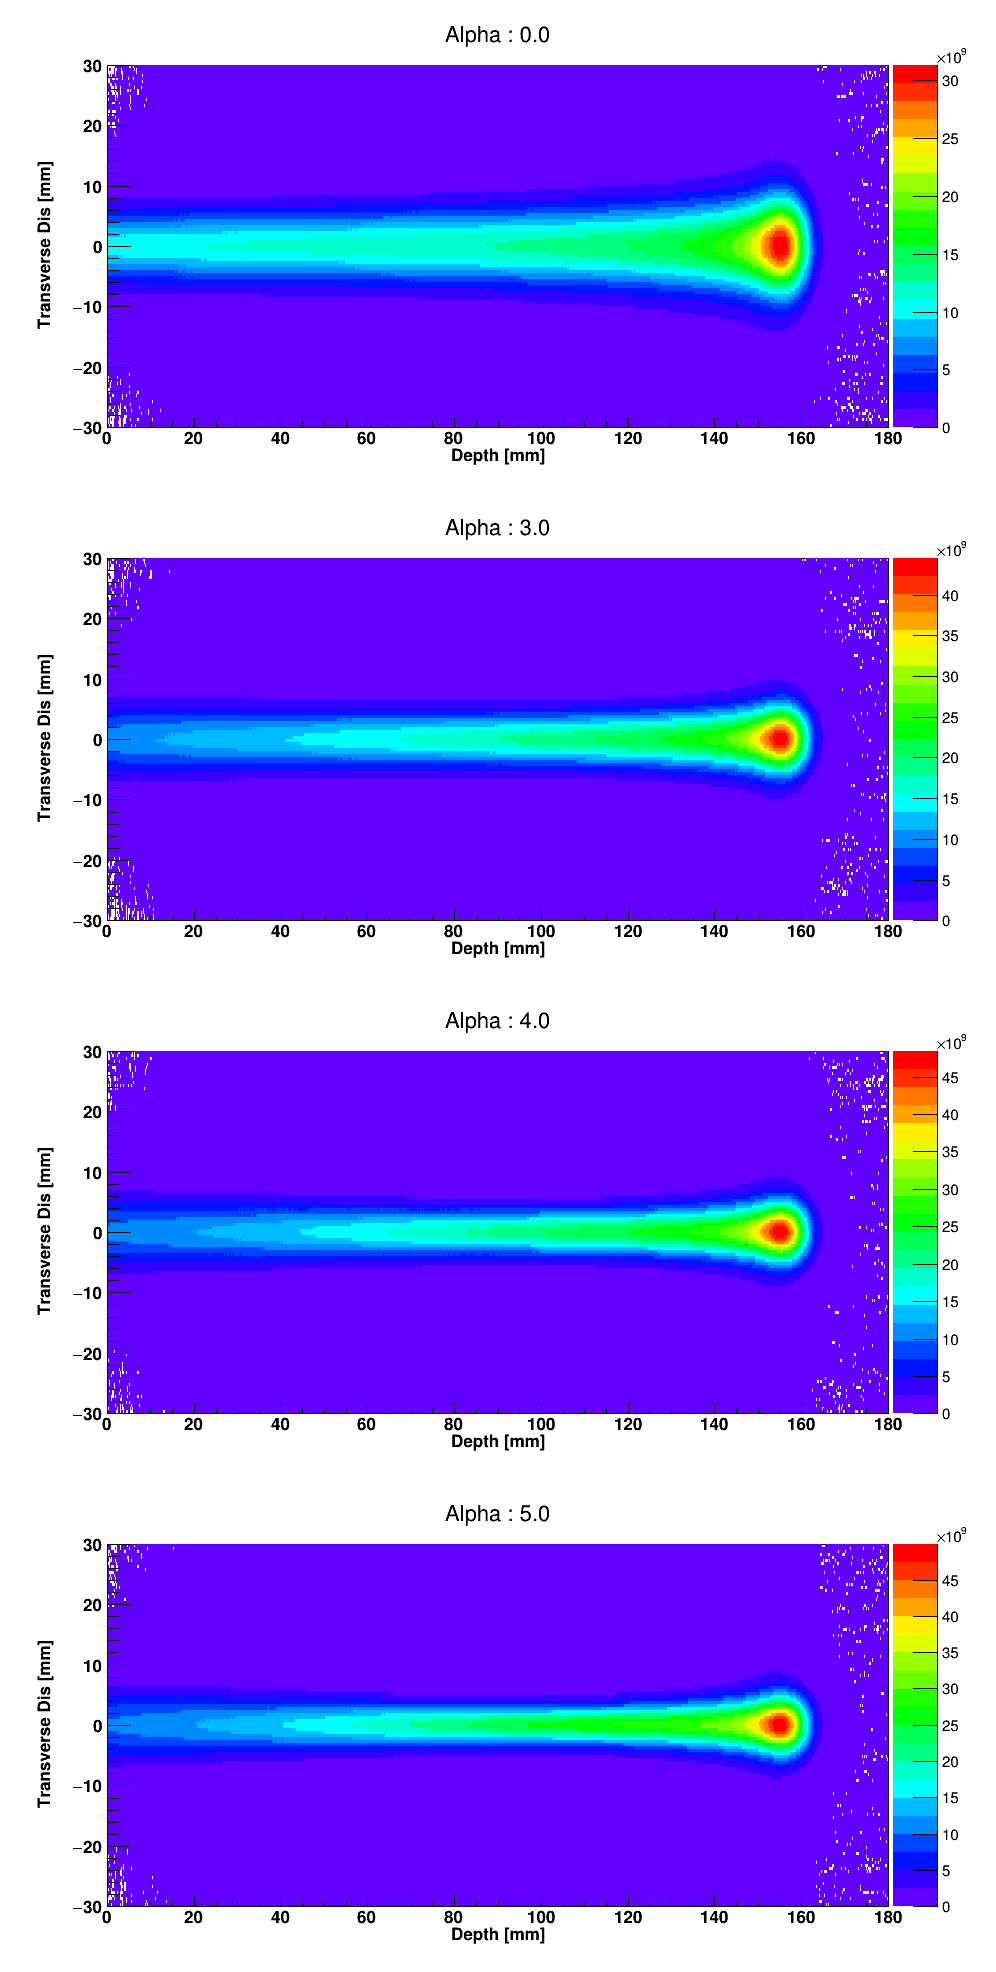

In [59]:
cs = TCanvas("cs","cs", 1000,2000)
cs.Divide(1,4)

for i in range(0,4):
    cs.cd(i+1);
    cs.SetFillColor( 0 )
    cs.GetFrame().SetFillColor( 21 )
    cs.GetFrame().SetBorderSize( 6 )
    cs.GetFrame().SetBorderMode( -1 )
    Energy_Distribution[i].GetXaxis().SetTitle("Depth [mm]");
    Energy_Distribution[i].GetYaxis().SetTitle("Transverse Dis [mm]");
    Energy_Distribution[i].GetXaxis().CenterTitle();
    Energy_Distribution[i].GetYaxis().CenterTitle();
    Energy_Distribution[i].GetXaxis().SetRangeUser(0, 180);
    Energy_Distribution[i].GetYaxis().SetRangeUser(-30, 30);
    x = DataFileList[i]
    x = "Alpha : "+x[18:-31]
    gStyle.SetPalette(1)
    Energy_Distribution[i].SetTitle(x)
    Energy_Distribution[i].SetStats(0)
    cs.Modified()
    cs.Update()
    
    Energy_Distribution[i].Draw("COLZ")
 
cs.Draw()
cs.Print("Energy_XZ_4mm_Radius_Alpha0to5.png")   

In [262]:
DataFile = ROOT.TFile(DataFileLocation+DataFileList[3])

print(DataFile)
FileContent = pd.DataFrame(DataFile.ls())
display(FileContent)

Name: /home/fardousr/Desktop/Output/Collimator_Data/Without 2d letdata/Coll_Energy_150MeV_Radius_2.0mm.root Title: 


""


TFile**		/home/fardousr/Desktop/Output/Collimator_Data/Without 2d letdata/Coll_Energy_150MeV_Radius_2.0mm.root	
 TFile*		/home/fardousr/Desktop/Output/Collimator_Data/Without 2d letdata/Coll_Energy_150MeV_Radius_2.0mm.root	
  KEY: TH1D	ProtonLongEnergyHisto;1	Energy Deposition(Proton)
  KEY: TH3D	ProtonEnergyHisto;2	Energy Deposition(Proton)
  KEY: TH1D	ProtonEnergyHisto;1	Energy Deposition(Proton)
  KEY: TH1D	ProtonLETdataHisto;1	LET data(Protons)
  KEY: TH1D	ParticelCounter;1	Number of Particles at Water Surface
  KEY: TH1D	ProtonFluence;1	Number of Proton with depth
  KEY: TH1D	Proton1Fluence;1	Number of Proton with depth
  KEY: TH1D	Proton2Fluence;1	Number of Proton with depth
  KEY: TH1D	Proton3Fluence;1	Number of Proton with depth
  KEY: TH1D	Proton4Fluence;1	Number of Proton with depth
  KEY: TH1D	Proton5Fluence;1	Number of Proton with depth
  KEY: TH1D	Proton8Fluence;1	Number of Proton with depth
  KEY: TH1D	Proton10Fluence;1	Number of Proton with depth
  KEY: TH1D	Proton15Flue

In [26]:
def plot1DHisto(histo, title ="One Dimensional Histogram", x = "X", y = "Y"):
    can = TCanvas( 'c1', 'Deterministic LET', 200, 10, 2400, 1500)
    can.SetFillColor( 19 )
    can.GetFrame().SetFillColor( 21 )
    can.GetFrame().SetBorderSize( 6 )
    can.GetFrame().SetBorderMode( -1 )
    gStyle.SetPalette(1)
    histo.GetXaxis().SetTitle(x);
    histo.GetYaxis().SetTitle(y);
    histo.GetXaxis().CenterTitle();
    histo.GetYaxis().CenterTitle();
    histo.GetXaxis().SetRangeUser(0, 180);
    histo.SetTitle(title)
    histo.Draw("HIST C")
    histo.SetStats(0)
    can.Modified()
    can.Update()
    can.histo = histo
    return can

def plot2DHisto(histo, title ="Two Dimensional Histogram", x = "X", y = "Y"):
    can = TCanvas( 'c1', 'Deterministic LET', 200, 10, 2400, 1500)
    can.SetFillColor( 19 )
    can.GetFrame().SetFillColor( 21 )
    can.GetFrame().SetBorderSize( 6 )
    can.GetFrame().SetBorderMode( -1 )
    gStyle.SetPalette(1)
    histo.GetXaxis().SetTitle(x);
    histo.GetYaxis().SetTitle(y);
    histo.GetXaxis().CenterTitle();
    histo.GetYaxis().CenterTitle();
    histo.GetXaxis().SetRangeUser(0, 180);
    histo.SetTitle(title)
    histo.Draw("COLZ")
    histo.SetStats(0)
    can.Modified()
    can.Update()
    can.histo = histo 
    return can

def RBEMatrix(file):
    RBE_min = 1
    c = 3.76
    dose_radius = 50/1000
    DataFile = ROOT.TFile(file)
    Energy_XZ = DataFile.Get('ProtonEnergyHisto').Project3D("XZ")
    Energy_ZZ = DataFile.Get('ProtonEnergyHisto').Project3D("Z")
    LETData   = DataFile.Get('LETDataHisto')
    LET       = LETData/(Energy_ZZ*1000000)

    RBE      = array( 'd' )
    depth    = array( 'd' )

    for j in range(1, 801):
        Energy = Energy_ZZ.GetBinContent(j)* 1.60218e-19
        Mass = mt.pi*dose_radius**2*Energy_ZZ.GetBinWidth(j)*997
        Dose = Energy/Mass
        LET_value = LET.GetBinContent(j)
        RBE_max_value = 0.892 + (0.179*LET_value)

        RBE_value = 1/(2*Dose)*(mt.sqrt(c**2 +(4*Dose*c*RBE_max_value)+(4*Dose**2*RBE_min**2)) -c)
        RBE.append(RBE_value)
        depth.append(LET.GetXaxis().GetBinCenter(j))

    RBE2D = TH2D("LET2D", "LET2D", 800, 0, 200, 200, -50, 50)

    for i in range(1,801):
        y=RBE[i-1]
        for j in range(1, 201):
            RBE2D.SetBinContent(i,j, y)
            
    RBE = RBE2D.Clone()
    RBE.SetDirectory(0)
    return RBE; 



Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


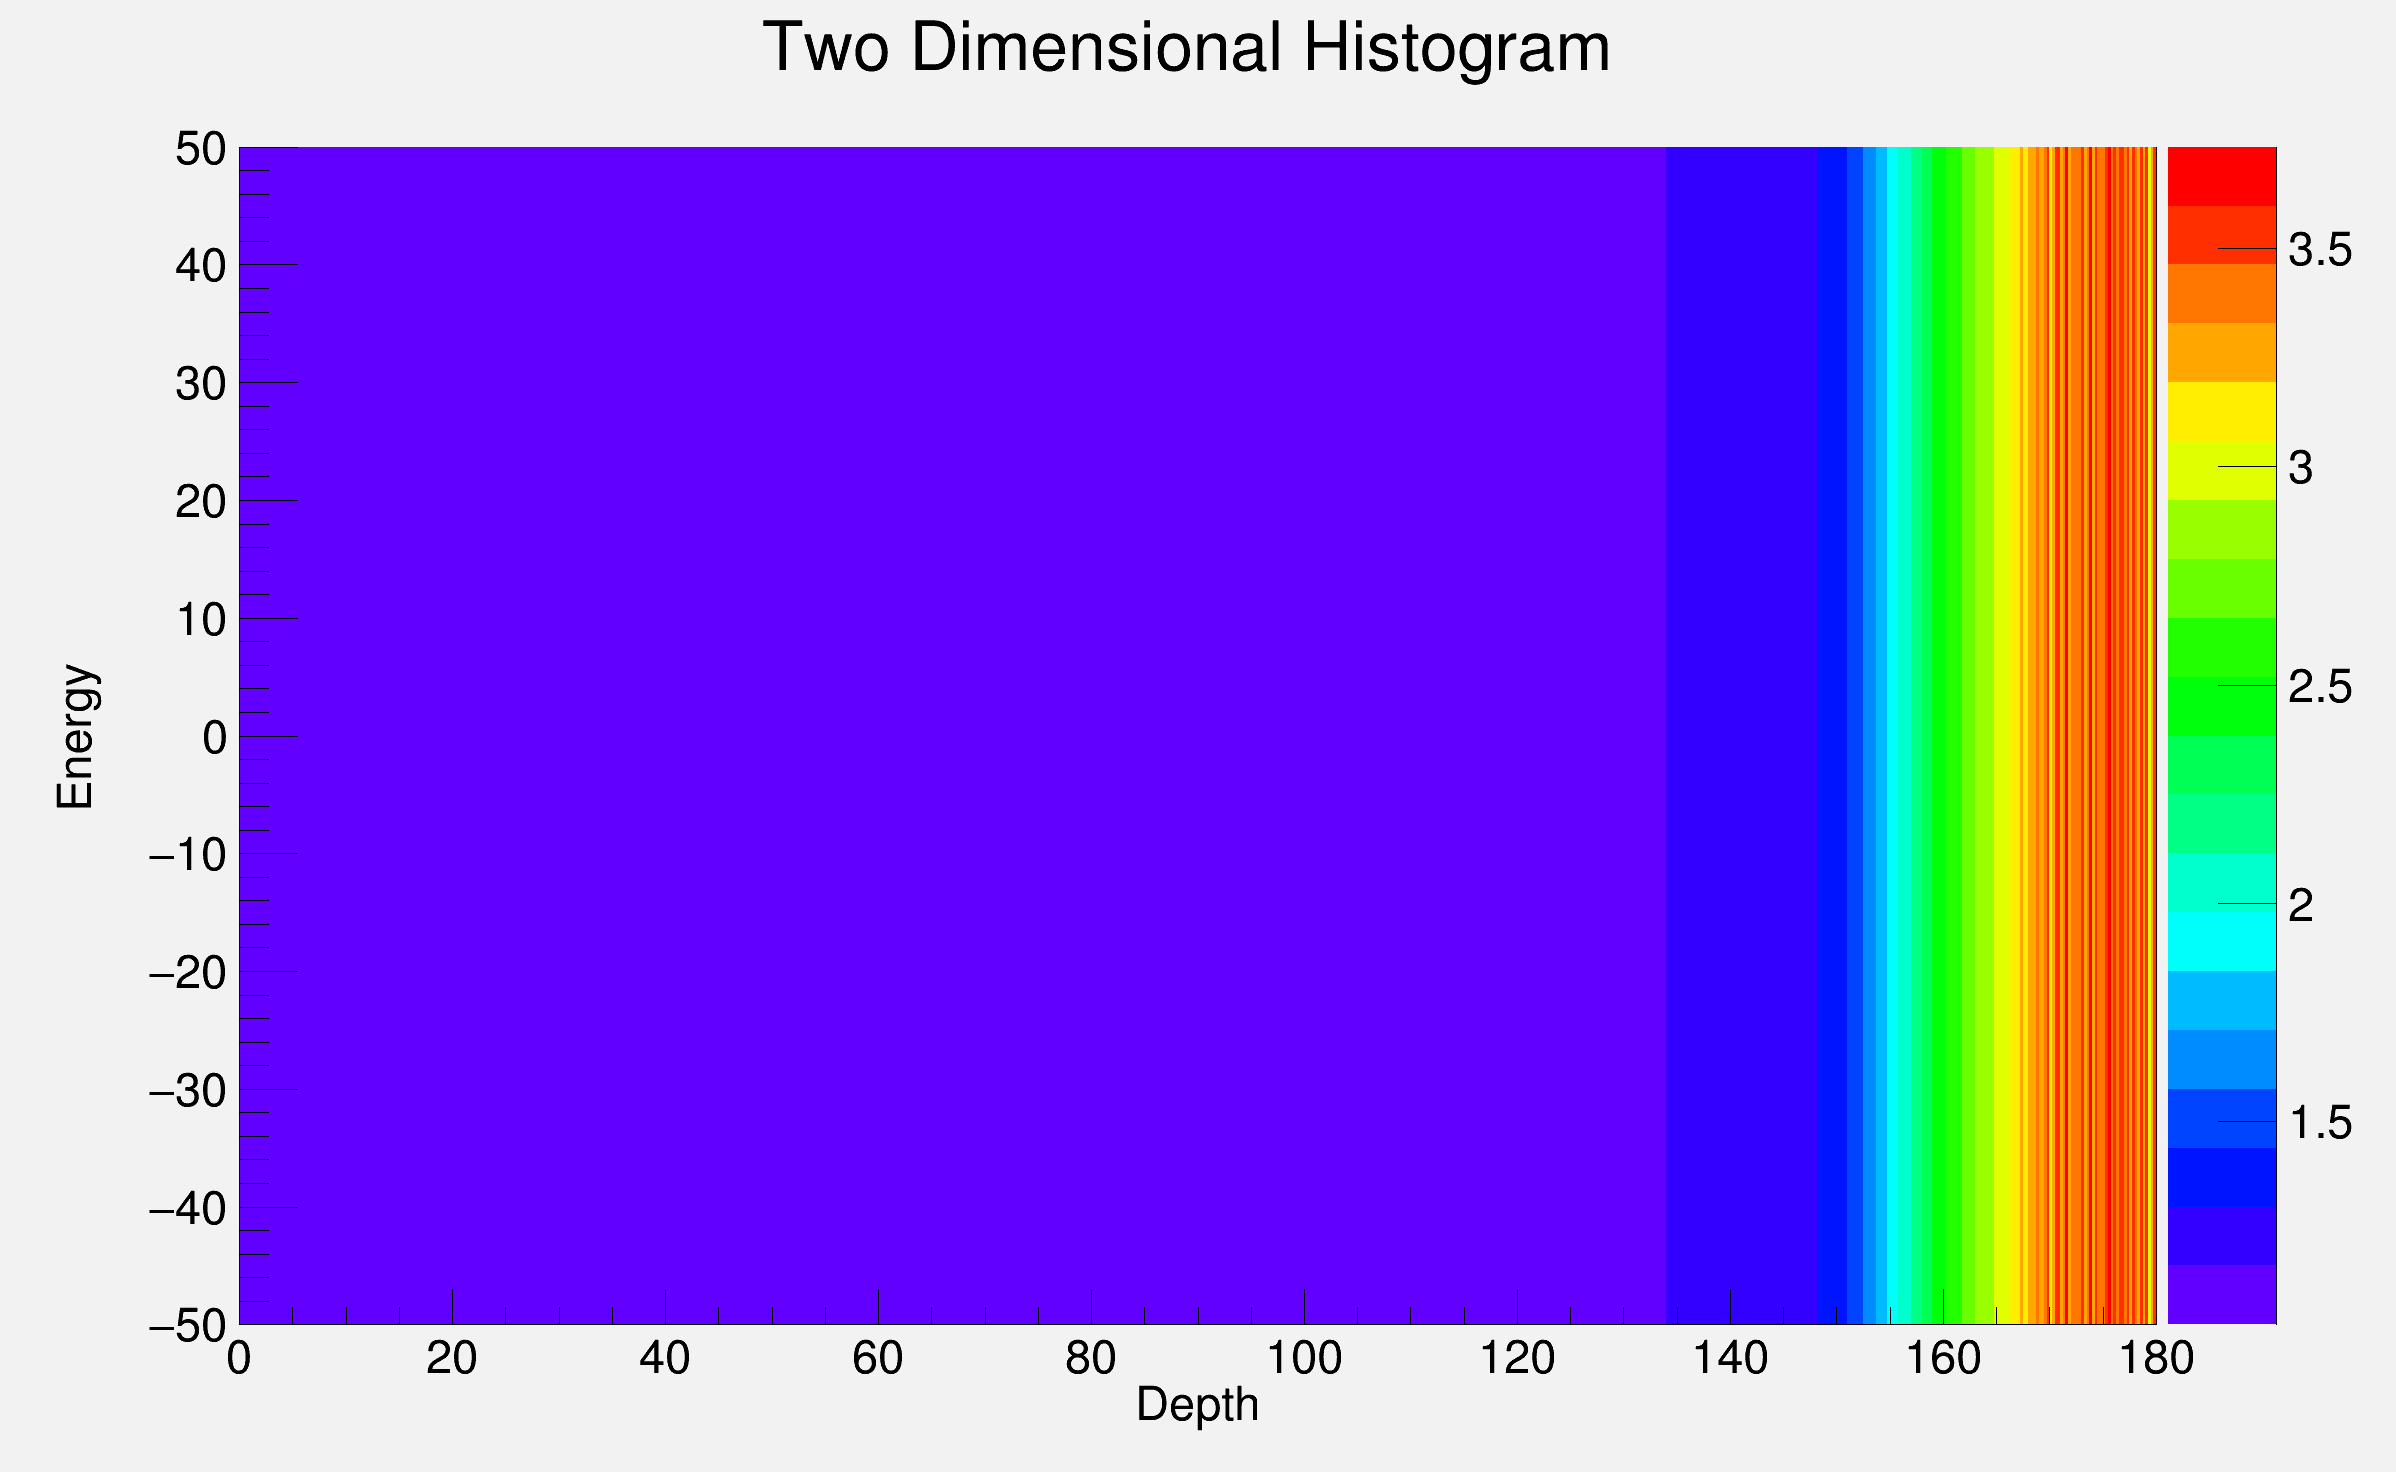

In [319]:
Energy_XZ = DataFile.Get('ProtonEnergyHisto').Project3D("XZ")
Energy_ZZ = DataFile.Get('ProtonEnergyHisto').Project3D("Z")
LETData   = DataFile.Get('LETDataHisto')
LET       = LETData/(Energy_ZZ*1000000)


constant  = TH1D("Constant", "Constant", 800, 0, 1)
for i in range (1, 801):
    constant.SetBinContent(i, 0.892)
    
LET.Scale(0.176) 
RBE_max_1D = TH1D("RBE_max", "RBE_max", 800, 0, 6)


for i in range(1, LET.GetNbinsX()+1):
    bin_content = LET.GetBinContent(i)
    max_rbe =   bin_content + 0.892
    RBE_max_1D.SetBinContent(i, max_rbe)

RBEmax = TH2D("LET2D", "LET2D", 800, 0, 200, 200, -50, 50)

for i in range(1,801):
    binContent=RBE_max_1D.GetBinContent(i)
    for j in range(1, 201):
        RBEmax.SetBinContent(i,j, binContent)

canvus1 = plot2DHisto(RBEmax, x="Depth", y="Energy")
canvus1.Draw()

# Energy_XZ.Multiply(RBEmax)
# canvus = plot2DHisto(Energy_XZ, x="Depth", y="Energy")
# canvus.Draw()
# print(canvus)

# RBE Histogram



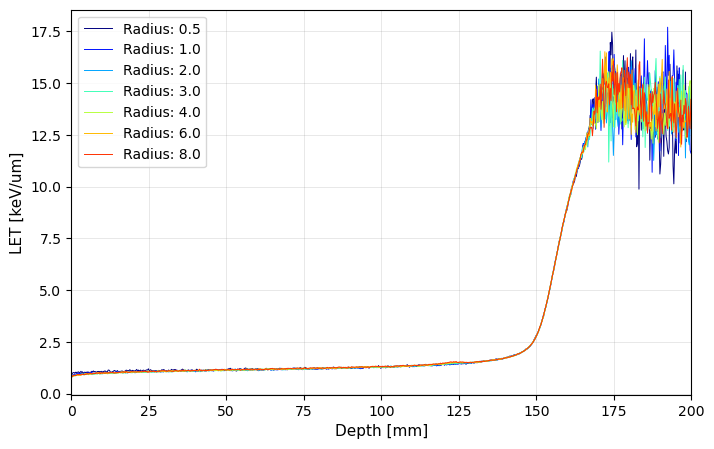

In [157]:
from pylab import rcParams
plt.rcdefaults()
rcParams['figure.figsize'] = 8, 5
plt.rcParams['axes.facecolor'] = 'white'


DataFileLocation = "/home/fardousr/Desktop/Output/Collimator_Data/Without 2d letdata/"
DataFileList = os.listdir(DataFileLocation)
File = pd.DataFrame(DataFileList)

colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, len(DataFileList)-1))))

for i in range(1, len(DataFileList)-1): 
    DataFile = ROOT.TFile(DataFileLocation+"/"+DataFileList[i])
    #DataFile = ROOT.TFile('/home/fardousr/Desktop/Output/Collimator_Data/Without 2d letdata/Coll_Energy_150MeV_Radius_1.0mm.root')
    Energy_XZ = DataFile.Get('ProtonEnergyHisto').Project3D("XZ")
    Energy_ZZ = DataFile.Get('ProtonEnergyHisto').Project3D("Z")
    LETData   = DataFile.Get('LETDataHisto')
    LET       = LETData/(Energy_ZZ*1000000)
    
    maxcon = Energy_ZZ.GetBinContent(Energy_ZZ.GetMaximumBin())
    
    Dose      = array( 'd' )
    LET_Data  = array( 'd' )
    RBE       = array( 'd' )
    depth     = array( 'd' )

    for j in range(1, 801):
        Dose.append(100*Energy_ZZ.GetBinContent(j)/maxcon)
        LET_value = LET.GetBinContent(j)
        REB_value = 0.892 + (0.179*LET_value)
        LET_Data.append(LET_value)
        depth.append(LET.GetXaxis().GetBinCenter(j))
    
    lineLegend = "Radius: "+DataFileList[i][26:29]
    plt.plot(depth, LET_Data, label = lineLegend, linewidth=.7)
    plt.xlim(0, 200)
    plt.grid(alpha =0.25, axis='both' , color='gray', linestyle='-', linewidth=.5)
    plt.legend(loc='upper left')
    plt.xlabel("Depth [mm]", fontsize=11)
    plt.ylabel("LET [keV/um]", fontsize=11)
plt.savefig("LET.png", dip = 500)    
plt.show()

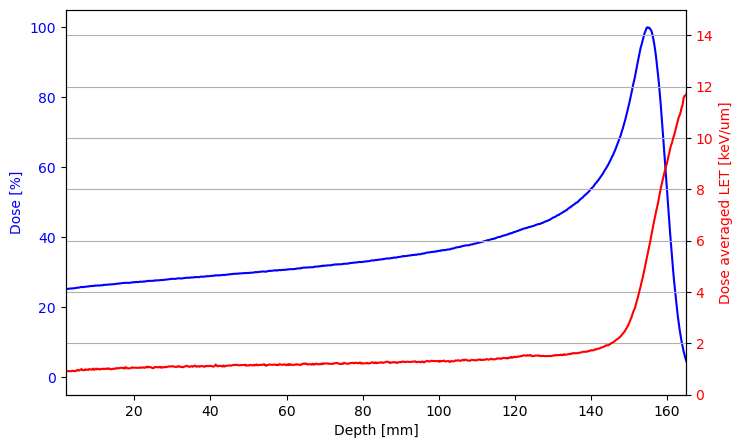

In [158]:
from pylab import rcParams
plt.rcdefaults()
rcParams['figure.figsize'] = 8, 5
plt.rcParams['axes.facecolor'] = 'white'

fig, ax1 = plt.subplots()

ax1.set_xlabel('Depth [mm]')
ax1.set_ylabel('Dose [%]', color='blue')
ax1.plot(depth, Dose, color='blue')

plt.xlim(2,165)
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()  
ax2.set_ylabel('Dose averaged LET [keV/um]', color='red') 
ax2.plot(depth, LET_Data, color='red')
ax2.grid(True)
plt.ylim(0,15)
ax2.tick_params(axis='y', labelcolor='red')

# plt.title('Dose and Dose averaged LET')
# fig.tight_layout() 

plt.savefig("LET.png", dpi = 500)
plt.show()

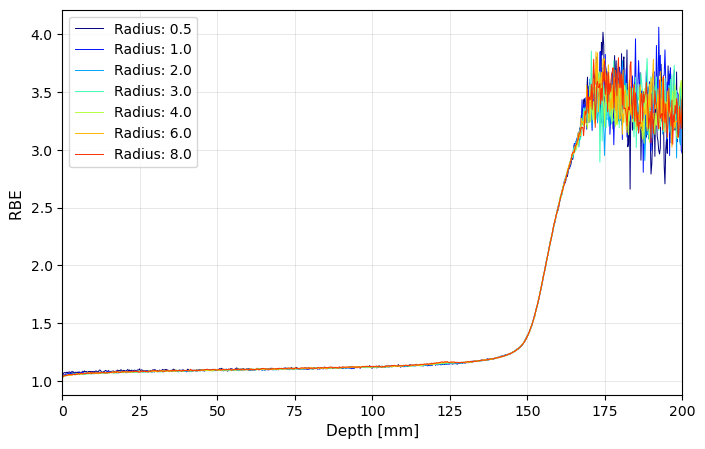

In [160]:
from pylab import rcParams
plt.rcdefaults()
rcParams['figure.figsize'] = 8, 5
plt.rcParams['axes.facecolor'] = 'white'


DataFileLocation = "/home/fardousr/Desktop/Output/Collimator_Data/Without 2d letdata/"
DataFileList = os.listdir(DataFileLocation)
File = pd.DataFrame(DataFileList)

colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, len(DataFileList)-1))))

RBE_min = 1
c = 3.76
dose_radius = 50/1000
for i in range(1, len(DataFileList)-1): 
    DataFile = ROOT.TFile(DataFileLocation+"/"+DataFileList[i])
    #DataFile = ROOT.TFile('/home/fardousr/Desktop/Output/Collimator_Data/Without 2d letdata/Coll_Energy_150MeV_Radius_1.0mm.root')
    Energy_XZ = DataFile.Get('ProtonEnergyHisto').Project3D("XZ")
    Energy_ZZ = DataFile.Get('ProtonEnergyHisto').Project3D("Z")
    LETData   = DataFile.Get('LETDataHisto')
    LET       = LETData/(Energy_ZZ*1000000)
    
    maxcon    = Energy_ZZ.GetBinContent(Energy_ZZ.GetMaximumBin())
    Dose1      = array( 'd' )
    RBE       = array( 'd' )
    depth     = array( 'd' )

    for j in range(1, 801):
        Dose1.append(100*Energy_ZZ.GetBinContent(j)/maxcon)
        Energy = Energy_ZZ.GetBinContent(j)* 1.60218e-19
        Mass = mt.pi*dose_radius**2*Energy_ZZ.GetBinWidth(j)*997
        Dose = Energy/Mass
        LET_value = LET.GetBinContent(j)
        RBE_max_value = 0.892 + (0.179*LET_value)
        
        RBE_value = 1/(2*Dose)*(mt.sqrt(c**2 +(4*Dose*c*RBE_max_value)+(4*Dose**2*RBE_min**2)) -c)
        RBE.append(RBE_value)
        depth.append(LET.GetXaxis().GetBinCenter(j))
    
    lineLegend = "Radius: "+DataFileList[i][26:29]
    plt.plot(depth, RBE, label = lineLegend, linewidth=.7)
    plt.xlim(0, 200)
    plt.grid(alpha =0.25, axis='both' , color='gray', linestyle='-', linewidth=.5)
    plt.legend(loc='upper left')
    plt.xlabel("Depth [mm]", fontsize=11)
    plt.ylabel("RBE ", fontsize=11)
plt.savefig("RBE.png", dip = 500)    
plt.show()

RBE2D = TH2D("LET2D", "LET2D", 800, 0, 200, 200, -50, 50)

for i in range(1,801):
    y=RBE[i-1]
    for j in range(1, 201):
        RBE2D.SetBinContent(i,j, y)

# can1 = TCanvas( 'c1', 'Deterministic LET', 200, 10, 2400, 1500)
# can1.SetFillColor( 19 )
# can1.GetFrame().SetFillColor( 21 )
# can1.GetFrame().SetBorderSize( 6 )
# can1.GetFrame().SetBorderMode( -1 )
# RBE2D.GetXaxis().SetTitle("Depth [mm]");
# RBE2D.GetYaxis().SetTitle("Radius [mm]");
# RBE2D.Draw()
# RBE2D.GetXaxis().CenterTitle();
# RBE2D.GetYaxis().CenterTitle();
# RBE2D.GetXaxis().SetRangeUser(0, 180);
# # hist.GetYaxis().SetRangeUser(0, 50);
# RBE2D.SetTitle("Energy: 350MeV, Alpha: 7.0, Beta: 300.0mm, Sigma:10.mm")
# RBE2D.Draw("COLZ")
# gStyle.SetPalette(1)
# RBE2D.SetStats(0)
# can1.Modified()
# can1.Update()
# can1.Draw()

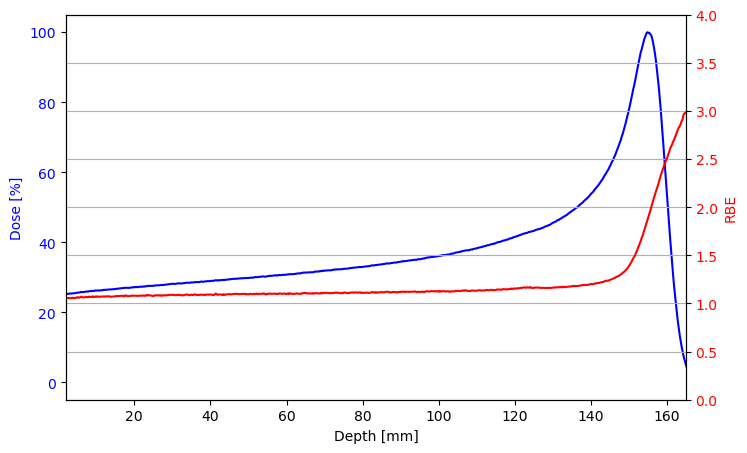

In [161]:
from pylab import rcParams
plt.rcdefaults()
rcParams['figure.figsize'] = 8, 5
plt.rcParams['axes.facecolor'] = 'white'

fig, ax1 = plt.subplots()

ax1.set_xlabel('Depth [mm]')
ax1.set_ylabel('Dose [%]', color='blue')
ax1.plot(depth, Dose1, color='blue')

plt.xlim(2,165)
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()  
ax2.set_ylabel('RBE', color='red') 
ax2.plot(depth, RBE, color='red')
ax2.grid(True)
plt.ylim(0,4)
ax2.tick_params(axis='y', labelcolor='red')

# plt.title('Dose and Dose averaged LET')
# fig.tight_layout() 

plt.savefig("RBE.png", dpi = 500)
plt.show()

Name: LET2D Title: LET2D NbinsX: 800


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


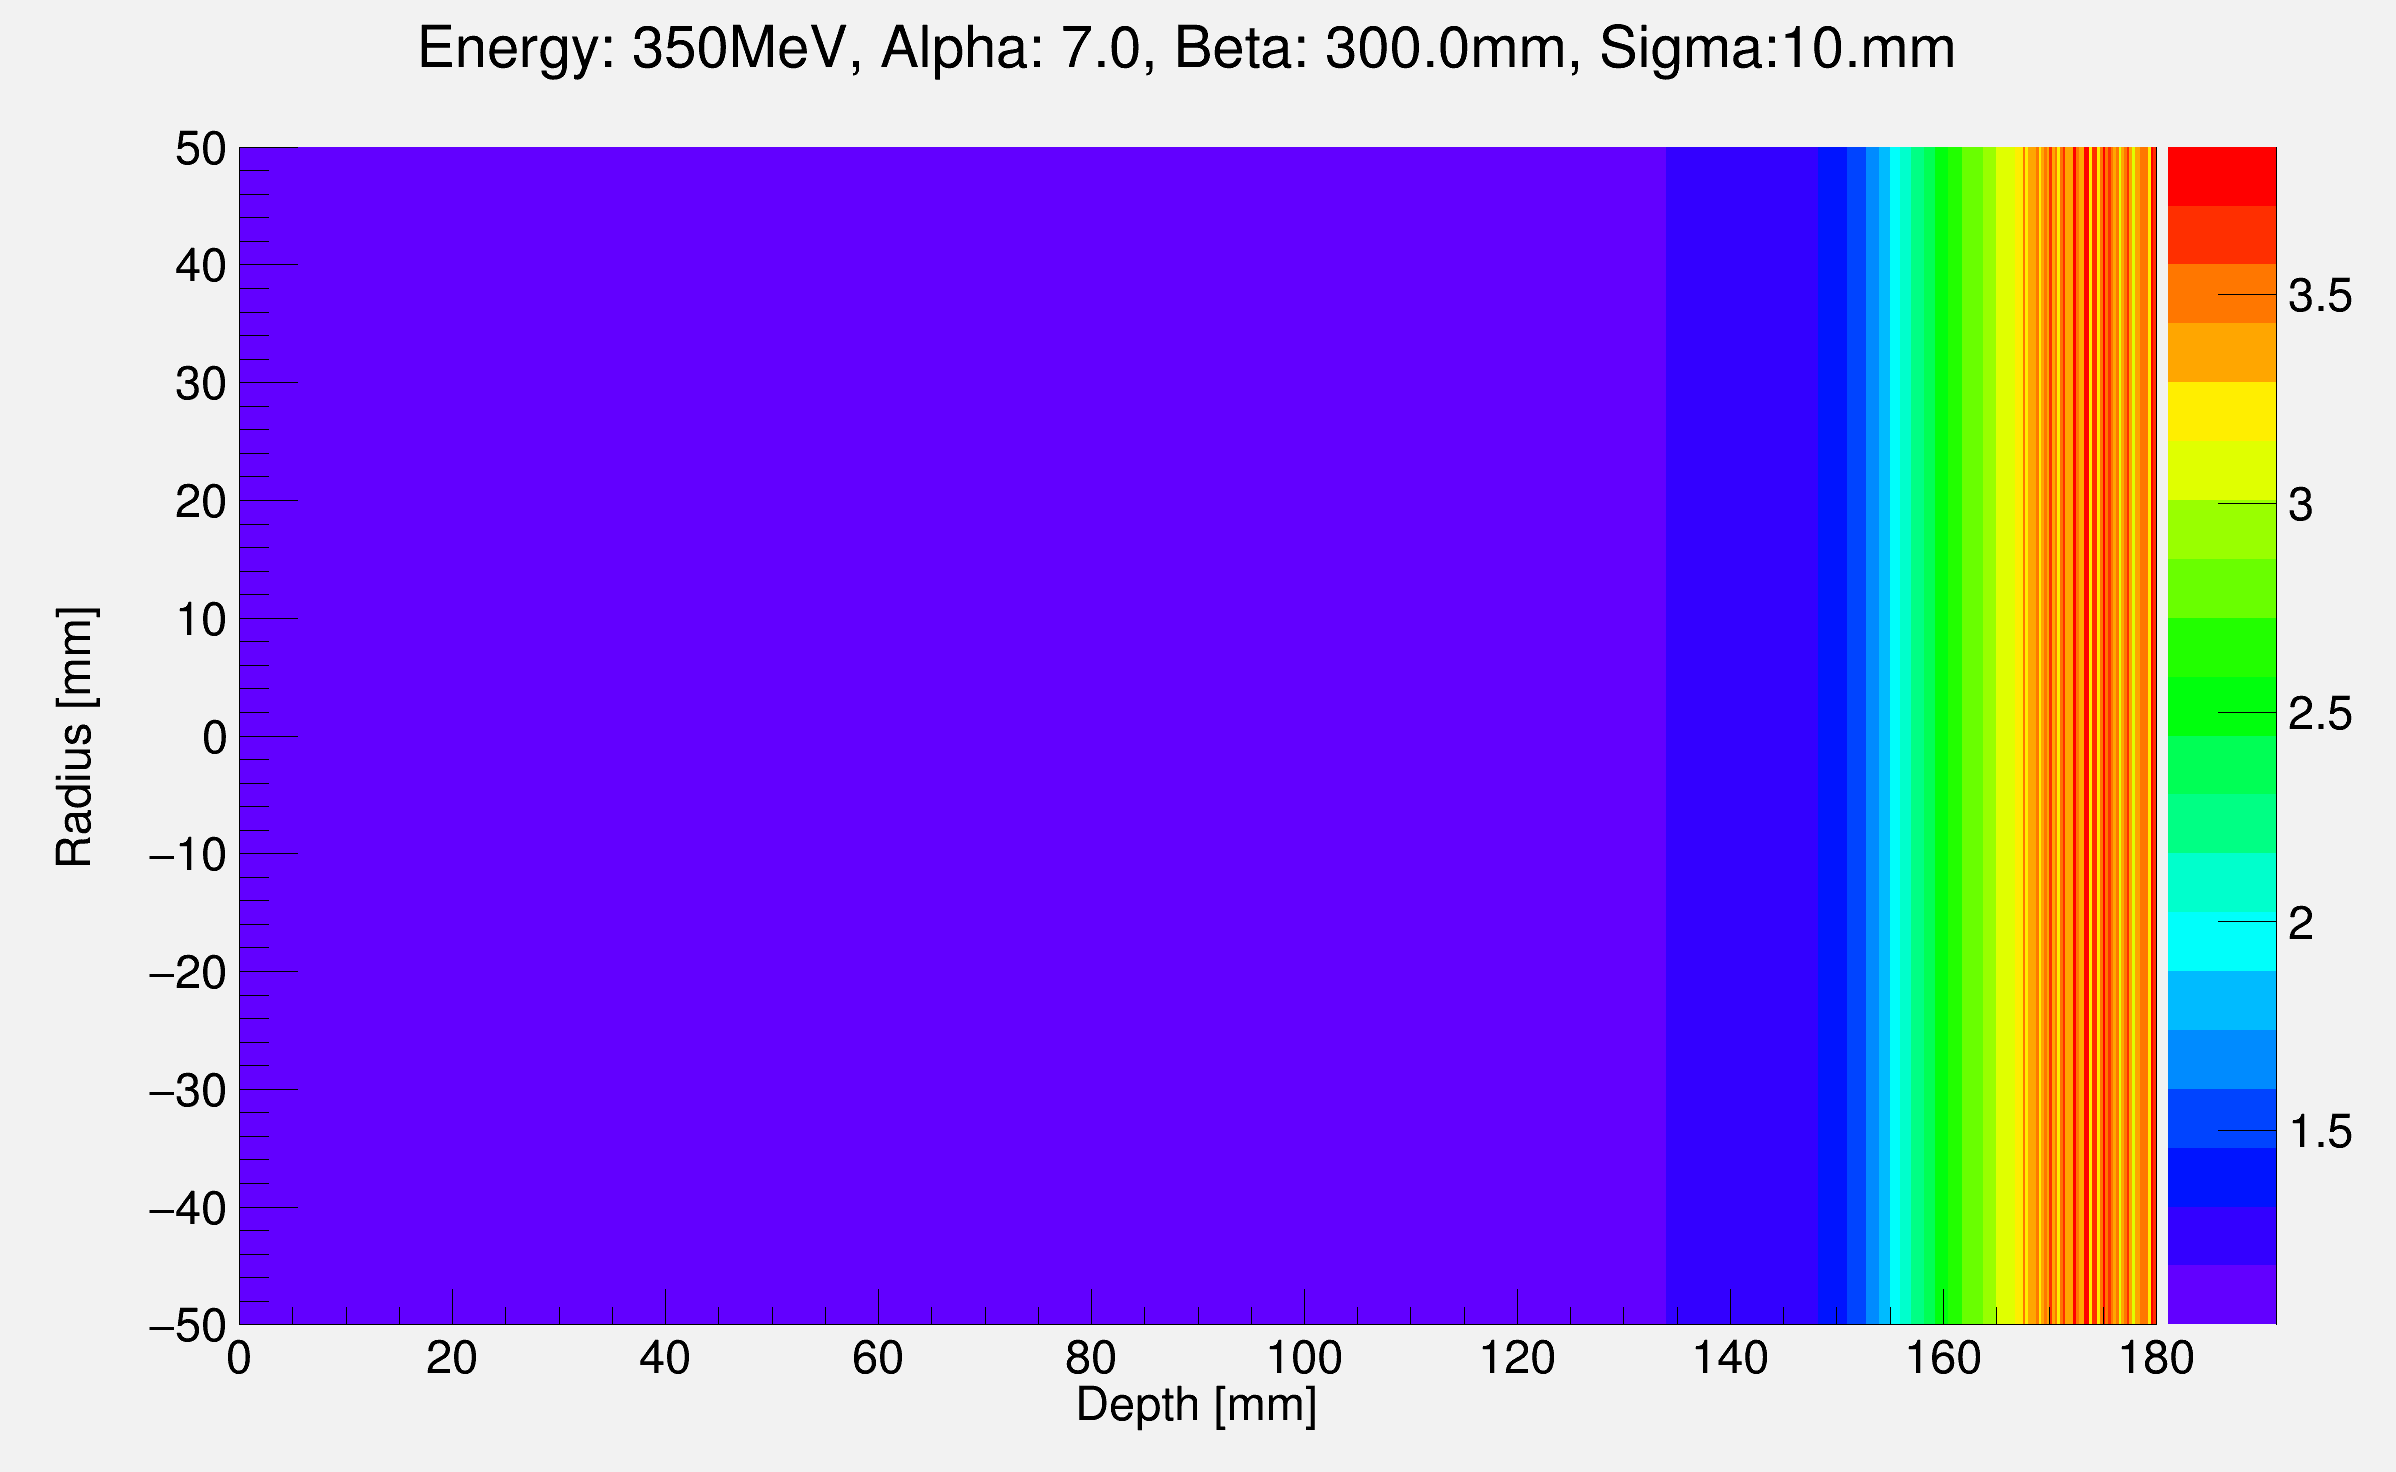

In [111]:
RBE2D = RBEMatrix('/home/fardousr/Desktop/Output/Collimator_Data/Without 2d letdata/Coll_Energy_150MeV_Radius_1.0mm.root')
print(RBE2D)
can1 = TCanvas( 'c1', 'Deterministic LET', 200, 10, 2400, 1500)
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
RBE2D.GetXaxis().SetTitle("Depth [mm]");
RBE2D.GetYaxis().SetTitle("Radius [mm]");
RBE2D.Draw()
RBE2D.GetXaxis().CenterTitle();
RBE2D.GetYaxis().CenterTitle();
RBE2D.GetXaxis().SetRangeUser(0, 180);
# hist.GetYaxis().SetRangeUser(0, 50);
RBE2D.SetTitle("Energy: 350MeV, Alpha: 7.0, Beta: 300.0mm, Sigma:10.mm")
RBE2D.Draw("COLZ")
gStyle.SetPalette(1)
RBE2D.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()

In [ ]:
hist1 = DataFile.Get('LETDataHisto')
hist2 = DataFile.Get('ProtonLongEnergyHisto')

hist = (hist1/hist2)
hist.Scale(1/1000000)
#hist.Scale(0.179)
x = TH1D("LET2D", "LET2D", 800, 0, 200)
print(x)
print(hist)

for i in range(1,801):
    v = hist.GetBinContent(i)
    x.SetBinContent(i, 0.892+0.179*v)

REBmax = TH2D("LET2D", "LET2D", 800, 0, 200, 200, -50, 50)

for i in range(1,801):
    y=x.GetBinContent(i)
    for j in range(1, 201):
        REBmax.SetBinContent(i,j, y)


174245.0
Name: LET2D Title: LET2D NbinsX: 800
Name: LETDataHisto Title: Proton LET Histo NbinsX: 800


Warning in <TFile::Append>: Replacing existing TH1: LET2D (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: LET2D (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


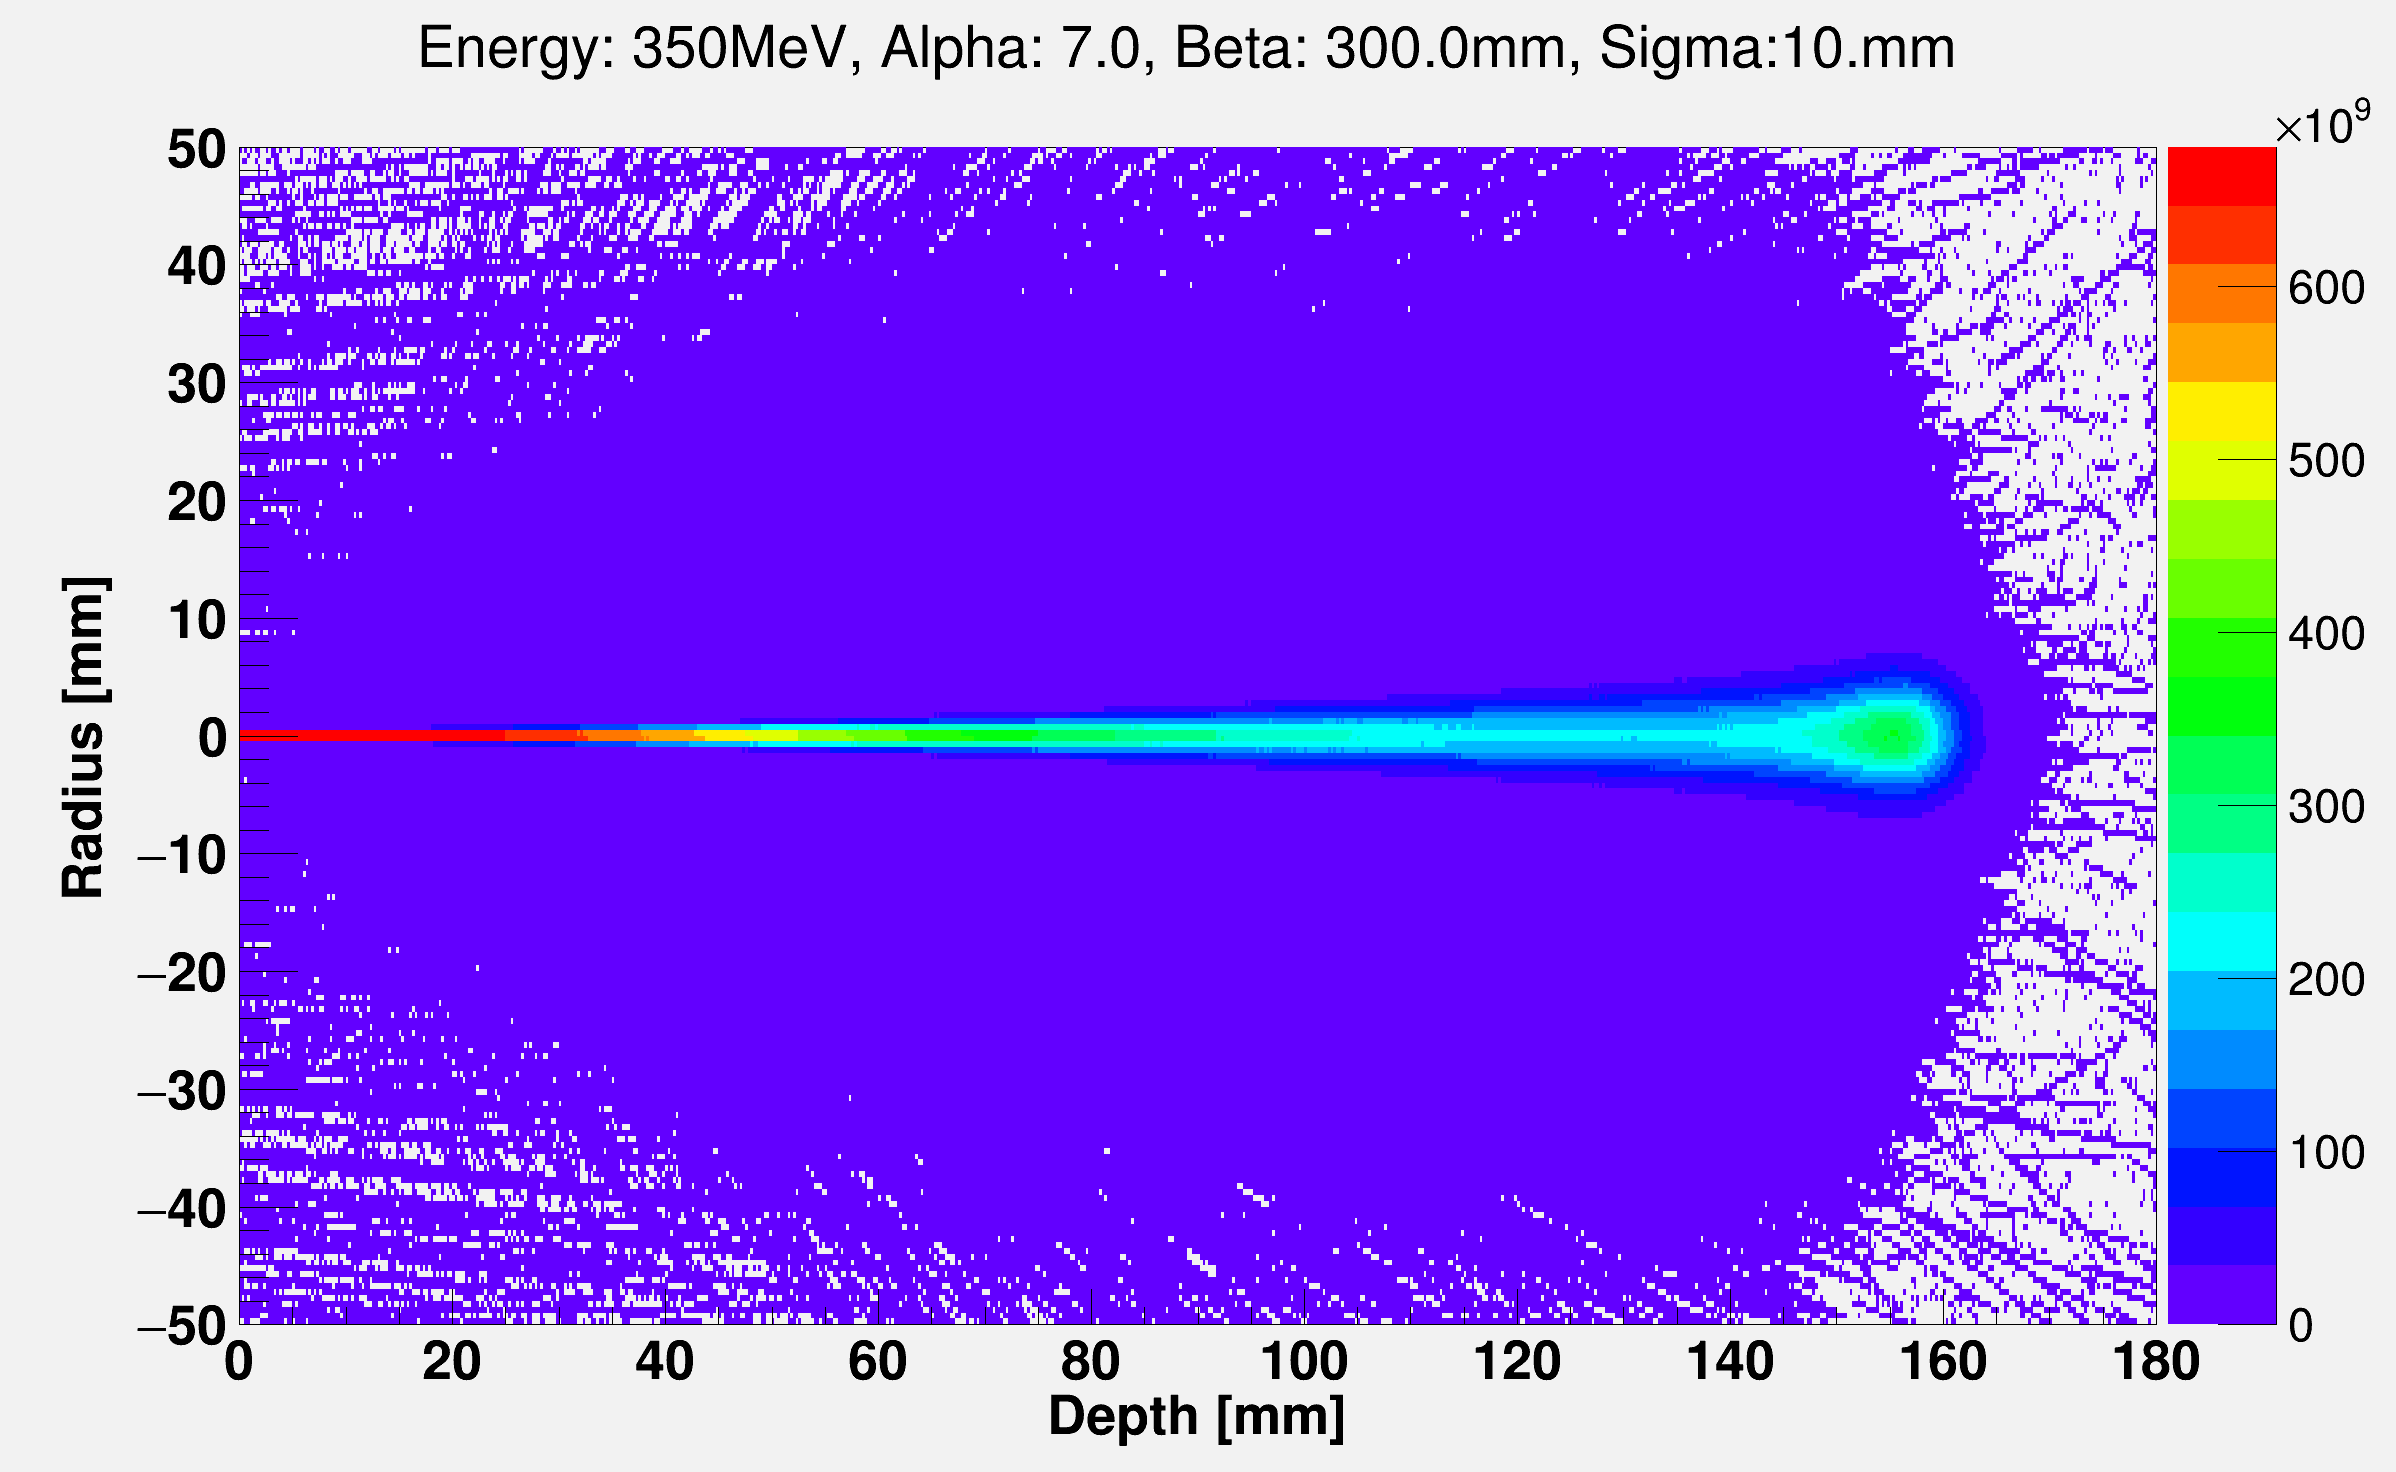

In [193]:
#DataFile = ROOT.TFile('/home/fardousr/Desktop/Output/Collimator_Data/Coll_Energy_150_Alpha:_0.0_Beta:_18800mm_Radius_3.0mm.root')
Energy_XZ_Col_1 = DataFile.Get('ProtonEnergyHisto').Project3D("XZ")
#hist = DataFile.Get('ProtonRadialHisto').ProjectionX("X", 1, 20)
NumProton = DataFile.Get('ParticelCounter').GetBinContent(1)
print(NumProton)
Energy_XZ_Col_1 = DataFile.Get('ProtonEnergyHisto').Project3D("XZ")

Energy_XZ_Col_1.Scale(10000000/NumProton)


hist1 = DataFile.Get('LETDataHisto')
hist2 = DataFile.Get('ProtonLongEnergyHisto')

hist = (hist1/hist2)
hist.Scale(1/1000000)
#hist.Scale(0.179)
x = TH1D("LET2D", "LET2D", 800, 0, 200)
print(x)
print(hist)

for i in range(1,801):
    v = hist.GetBinContent(i)
    x.SetBinContent(i, 0.892+0.179*v)

REBmax = TH2D("LET2D", "LET2D", 800, 0, 200, 200, -50, 50)

for i in range(1,801):
    y=x.GetBinContent(i)
    for j in range(1, 201):
        REBmax.SetBinContent(i,j, y)


Energy_XZ_Col_1.Multiply(REBmax)
can1 = TCanvas( 'c1', 'Deterministic LET', 200, 10, 2400, 1500)
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
Energy_XZ_Col_1.GetXaxis().SetTitle("Depth [mm]");
Energy_XZ_Col_1.GetYaxis().SetTitle("Radius [mm]");
Energy_XZ_Col_1.Draw()
Energy_XZ_Col_1.GetXaxis().CenterTitle();
Energy_XZ_Col_1.GetYaxis().CenterTitle();
Energy_XZ_Col_1.GetXaxis().SetRangeUser(0, 180);
# hist.GetYaxis().SetRangeUser(0, 50);
Energy_XZ_Col_1.SetTitle("Energy: 350MeV, Alpha: 7.0, Beta: 300.0mm, Sigma:10.mm")
Energy_XZ_Col_1.Draw("COLZ")
gStyle.SetPalette(1)
Energy_XZ_Col_1.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()

Name: LET2D Title: LET2D NbinsX: 800
Name: LETDataHisto Title: Proton LET Histo NbinsX: 800


Warning in <TFile::Append>: Replacing existing TH1: LET2D (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: LET2D (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


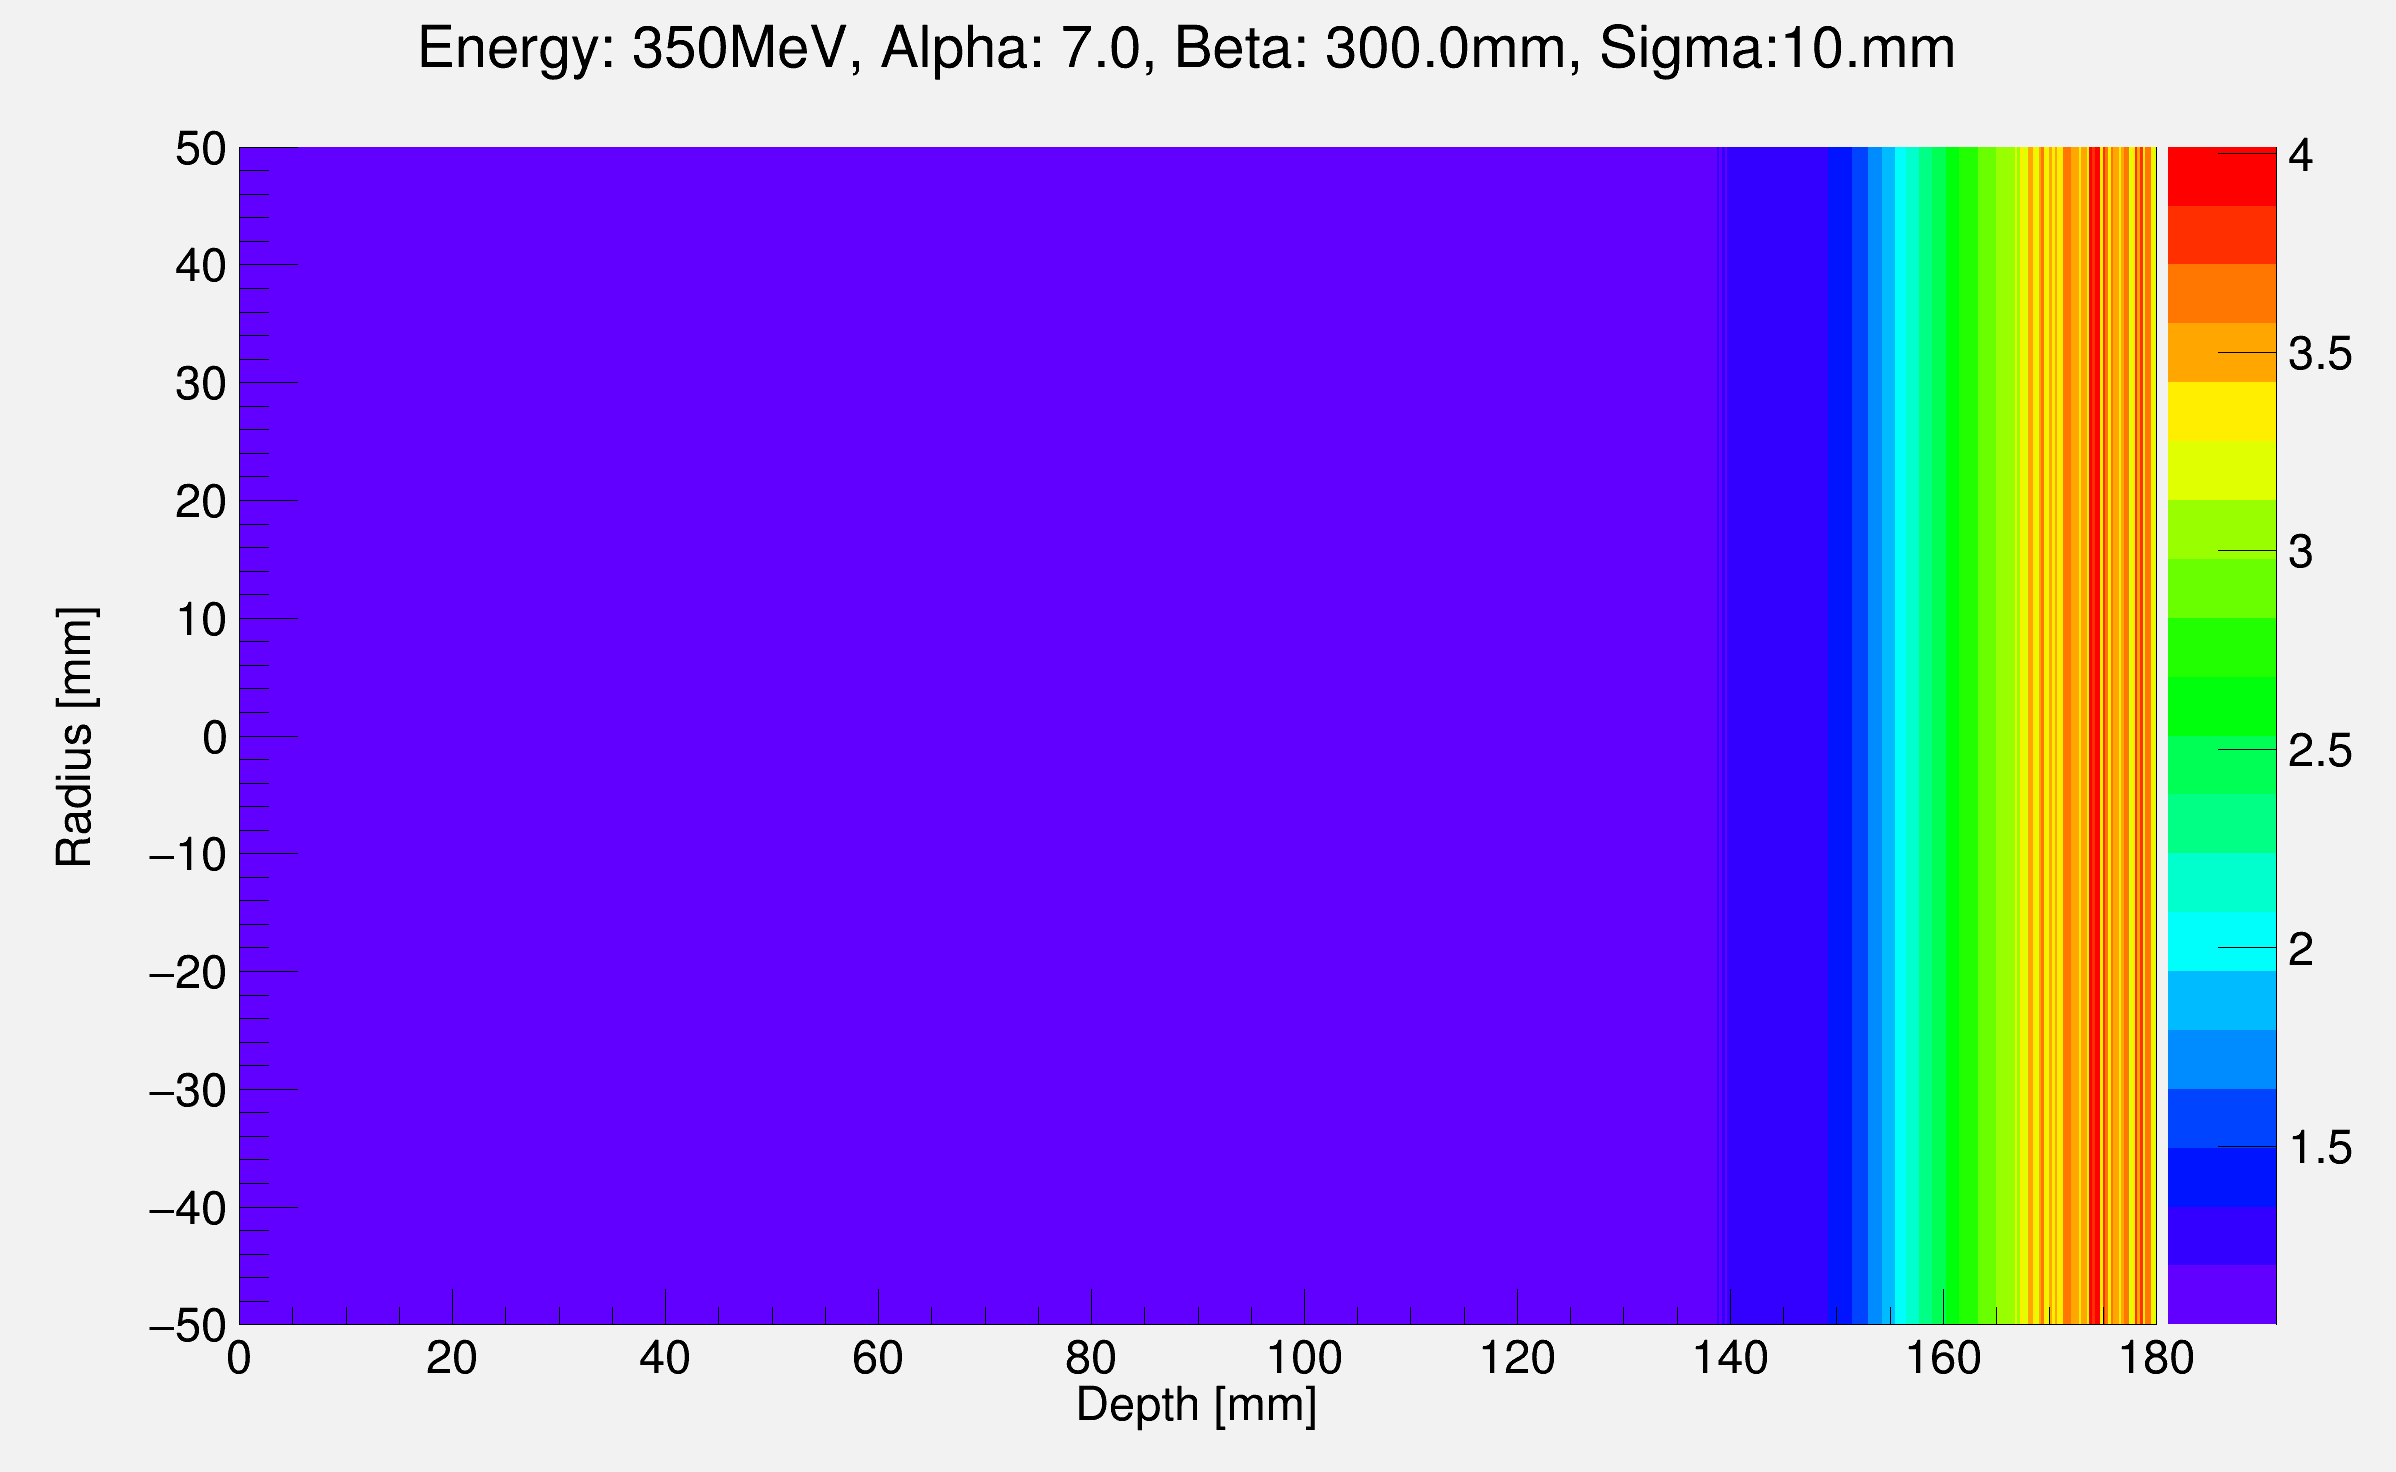

In [191]:
#hist = DataFile.Get('ProtonFluence').ProjectionX("X", 1, 100)
#hist = DataFile.Get('ProtonRadialHisto').ProjectionX("X", 1, 20)

hist1 = DataFile.Get('LETDataHisto')
hist2 = DataFile.Get('ProtonLongEnergyHisto')

hist = (hist1/hist2)
hist.Scale(1/1000000)
#hist.Scale(0.179)
x = TH1D("LET2D", "LET2D", 800, 0, 200)
print(x)
print(hist)

for i in range(1,801):
    v = hist.GetBinContent(i)
    x.SetBinContent(i, 0.892+0.179*v)

REBmax = TH2D("LET2D", "LET2D", 800, 0, 200, 200, -50, 50)

for i in range(1,801):
    y=x.GetBinContent(i)
    for j in range(1, 201):
        REBmax.SetBinContent(i,j, y)
  
can1 = TCanvas( 'c1', 'Deterministic LET', 200, 10, 2400, 1500)
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
REBmax.GetXaxis().SetTitle("Depth [mm]");
REBmax.GetYaxis().SetTitle("Radius [mm]");
REBmax.Draw()
REBmax.GetXaxis().CenterTitle();
REBmax.GetYaxis().CenterTitle();
REBmax.GetXaxis().SetRangeUser(0, 180);
# hist.GetYaxis().SetRangeUser(0, 50);
REBmax.SetTitle("Energy: 350MeV, Alpha: 7.0, Beta: 300.0mm, Sigma:10.mm")
REBmax.Draw("COLZ")
gStyle.SetPalette(1)
REBmax.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()

In [222]:
DataFile = ROOT.TFile("/home/fardousr/Desktop/Output/Collimator_Data/Coll_Energy_150MeV_Radius_4.0mm.root")
Energy_XZ  = DataFile.Get('ProtonEnergyHisto')
LETData_XZ = DataFile.Get('LETData3DHisto')
LETData_XZ.Divide(LETData_XZ,Energy_XZ)
LETData_XZ.Scale(1/1000000)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


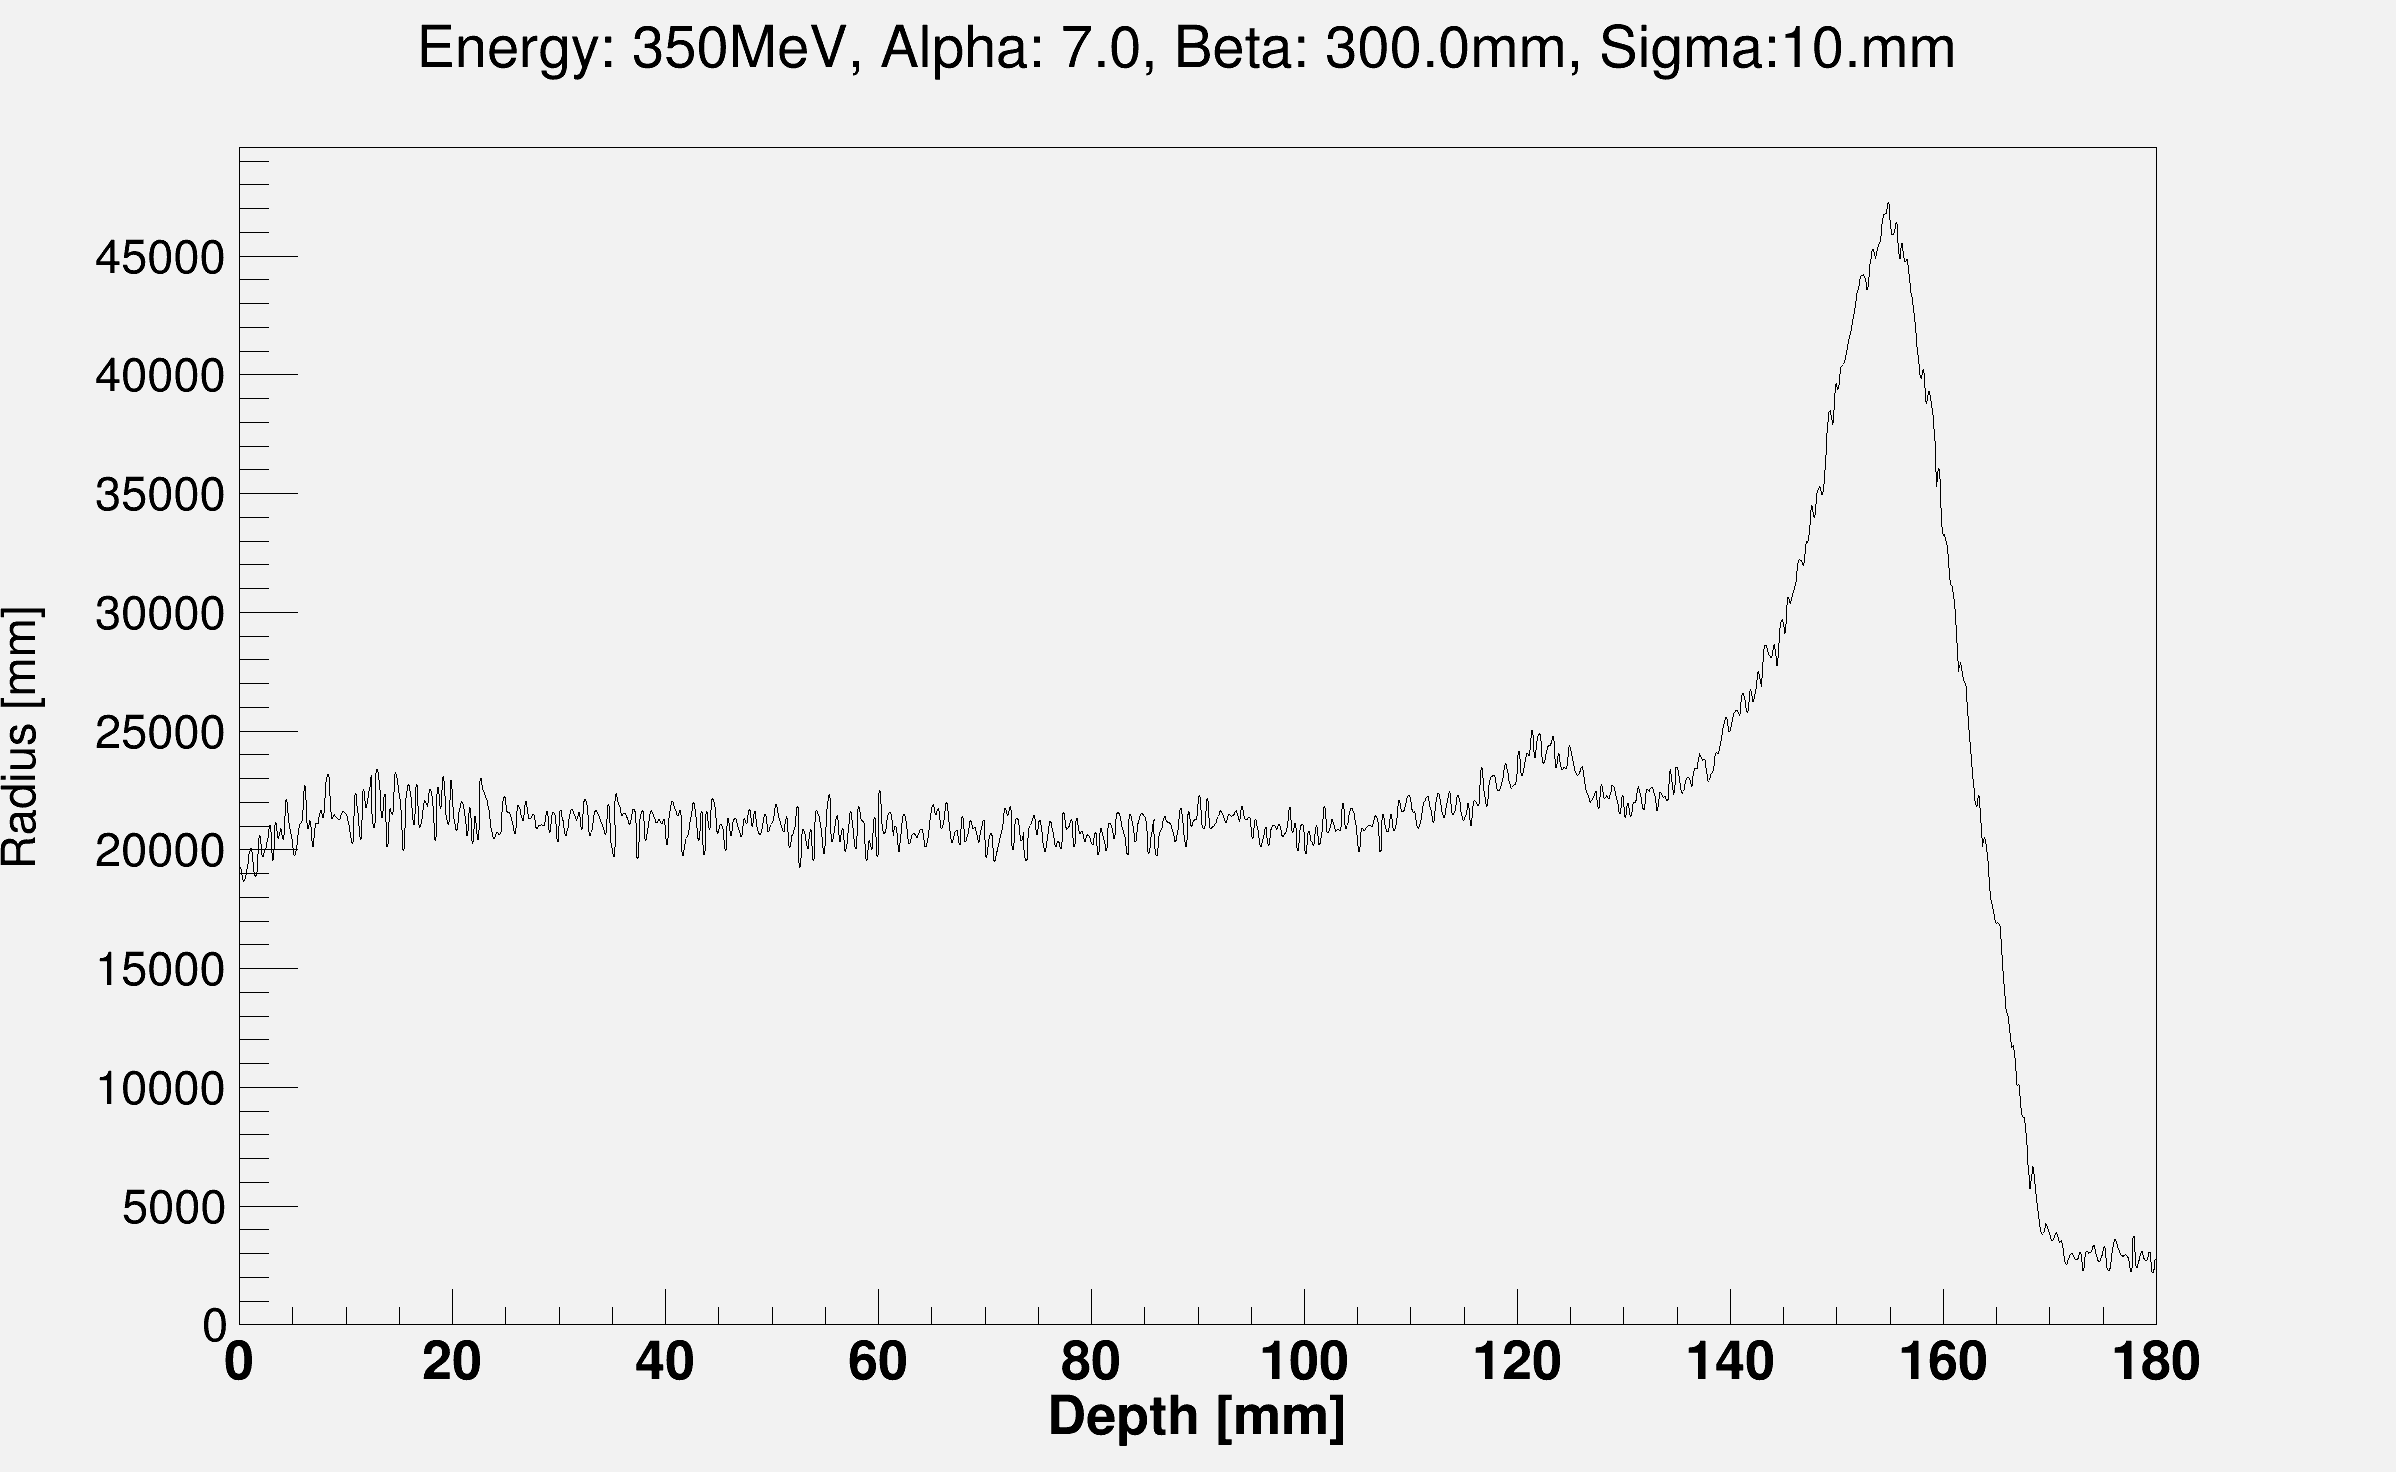

In [224]:
REBmax = LETData_XZ.Project3D("z")

can1 = TCanvas( 'c1', 'Deterministic LET', 200, 10, 2400, 1500)
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
REBmax.GetXaxis().SetTitle("Depth [mm]");
REBmax.GetYaxis().SetTitle("Radius [mm]");
REBmax.Draw()
REBmax.GetXaxis().CenterTitle();
REBmax.GetYaxis().CenterTitle();
REBmax.GetXaxis().SetRangeUser(0, 180);
# hist.GetYaxis().SetRangeUser(0, 50);
REBmax.SetTitle("Energy: 350MeV, Alpha: 7.0, Beta: 300.0mm, Sigma:10.mm")
REBmax.Draw("HIST C")
gStyle.SetPalette(1)
REBmax.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()

In [41]:
DataFileList = ["/home/fardousr/Desktop/Output/Convergent_Data/data/alpha0/Energy_150_Alpha:_0.0_Beta:_800.0mm_Sigma_2.0mm.root",
                "/home/fardousr/Desktop/Output/Convergent_Data/Energy_150_Alpha:_2.0_Beta:_800.0mm_Sigma_2.0mm.root",
                "/home/fardousr/Desktop/Output/Convergent_Data/Energy_150_Alpha:_3.0_Beta:_800.0mm_Sigma_2.0mm.root",
                "/home/fardousr/Desktop/Output/Convergent_Data/Energy_150_Alpha:_4.0_Beta:_800.0mm_Sigma_2.0mm.root"]

DataFileLocation = "/home/fardousr/Desktop/Output/Convergent_Data/"
DataFileList = os.listdir(DataFileLocation)
File = pd.DataFrame(DataFileList)
print(DataFileList)
display(File)
DataFile = ROOT.TFile(DataFileLocation+"/"+DataFileList[0])

['data', 'Energy_150_Alpha:_2.0_Beta:_800.0mm_Sigma_0.5mm.root', 'Energy_150_Alpha:_3.0_Beta:_800.0mm_Sigma_0.5mm.root', 'Energy_150_Alpha:_4.0_Beta:_800.0mm_Sigma_0.5mm.root', 'Energy_150_Alpha:_4.0_Beta:_800.0mm_Sigma_2.0mm.root', 'Energy_150_Alpha:_3.0_Beta:_800.0mm_Sigma_2.0mm.root', 'Energy_150_Alpha:_2.0_Beta:_800.0mm_Sigma_2.0mm.root', 'Energy_150_Alpha:_3.0_Beta:_800.0mm_Sigma_4.0mm.root', 'Energy_150_Alpha:_4.0_Beta:_800.0mm_Sigma_4.0mm.root', 'Energy_150_Alpha:_0.0_Beta:_800.0mm_Sigma_6.0mm.root', 'Energy_150_Alpha:_0.0_Beta:_800.0mm_Sigma_8.0mm.root', 'Energy_350_Alpha:_7.0_Beta:_300.0mm_Sigma_10.mm.root', 'Radius_4mm']


,0
0,data
1,Energy_150_Alpha:_2.0_Beta:_800.0mm_Sigma_0.5m...
2,Energy_150_Alpha:_3.0_Beta:_800.0mm_Sigma_0.5m...
3,Energy_150_Alpha:_4.0_Beta:_800.0mm_Sigma_0.5m...
4,Energy_150_Alpha:_4.0_Beta:_800.0mm_Sigma_2.0m...
5,Energy_150_Alpha:_3.0_Beta:_800.0mm_Sigma_2.0m...
6,Energy_150_Alpha:_2.0_Beta:_800.0mm_Sigma_2.0m...
7,Energy_150_Alpha:_3.0_Beta:_800.0mm_Sigma_4.0m...
8,Energy_150_Alpha:_4.0_Beta:_800.0mm_Sigma_4.0m...
9,Energy_150_Alpha:_0.0_Beta:_800.0mm_Sigma_6.0m...


SysError in <TFile::ReadBuffer>: error reading from file /home/fardousr/Desktop/Output/Convergent_Data//data (Is a directory)
Error in <TFile::Init>: /home/fardousr/Desktop/Output/Convergent_Data//data failed to read the file type data.


In [43]:
DataFileLocation = "/home/fardousr/Desktop/Output/Convergent_Data/Radius_4mm/"
DataFileList = os.listdir(DataFileLocation)
File = pd.DataFrame(DataFileList)
print(DataFileList)
display(File)


['Energy_150_Alpha:_0.0_Beta:_800.0mm_Sigma_4.0mm.root', 'Energy_150_Alpha:_3.0_Beta:_800.0mm_Sigma_4.0mm.root', 'Energy_150_Alpha:_4.0_Beta:_800.0mm_Sigma_4.0mm.root', 'Energy_150_Alpha:_5.0_Beta:_800.0mm_Sigma_4.0mm.root']


,0
0,Energy_150_Alpha:_0.0_Beta:_800.0mm_Sigma_4.0m...
1,Energy_150_Alpha:_3.0_Beta:_800.0mm_Sigma_4.0m...
2,Energy_150_Alpha:_4.0_Beta:_800.0mm_Sigma_4.0m...
3,Energy_150_Alpha:_5.0_Beta:_800.0mm_Sigma_4.0m...


In [44]:

Energy_x_BP1   =  []

for i in range(len(DataFileList)):
    DataFile = ROOT.TFile(DataFileLocation+DataFileList[i])
    Energy = DataFile.Get('ProtonEnergyHisto').Clone("Alpha_"+str(i))
    Energy.SetDirectory(0)
    name = DataFileList[i]+"_x"
    Distribution = Energy.ProjectionY(name, -200, 200, 152*4, 155*4).Clone(name)
    Distribution.SetDirectory(0)
    Energy_x_BP1.append(Distribution)
    
print(Energy_x_BP1)

[<cppyy.gbl.TH1D object at 0x5579a4dc2a20>, <cppyy.gbl.TH1D object at 0x5579a3647910>, <cppyy.gbl.TH1D object at 0x5579a505f3b0>, <cppyy.gbl.TH1D object at 0x5579a4f92430>]


 FCN=670321 FROM HESSE     STATUS=OK             18 CALLS         101 TOTAL
                     EDM=3.77555e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.84614e+11   2.03030e+08   2.78766e+05  -1.36433e-12
   2  Mean        -4.37065e-03   9.04542e-04   3.61611e-04   7.96839e-02
   3  Sigma        3.42304e+00   8.31398e-04   1.91896e-05  -5.45348e+00
 FCN=630734 FROM HESSE     STATUS=OK             18 CALLS          99 TOTAL
                     EDM=6.80337e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.59767e+11   1.93663e+08   2.66918e+05   2.48735e-12
   2  Mean        -1.63319e-03   9.43155e-04   3.65744e-04   1.58369e-02
   3  Sigma        3.57750e+00   8.

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file Transverse_Energy_Dis_BP(4mm)_GausFit(152mm-155)R4mmalpha0t05.png has been created


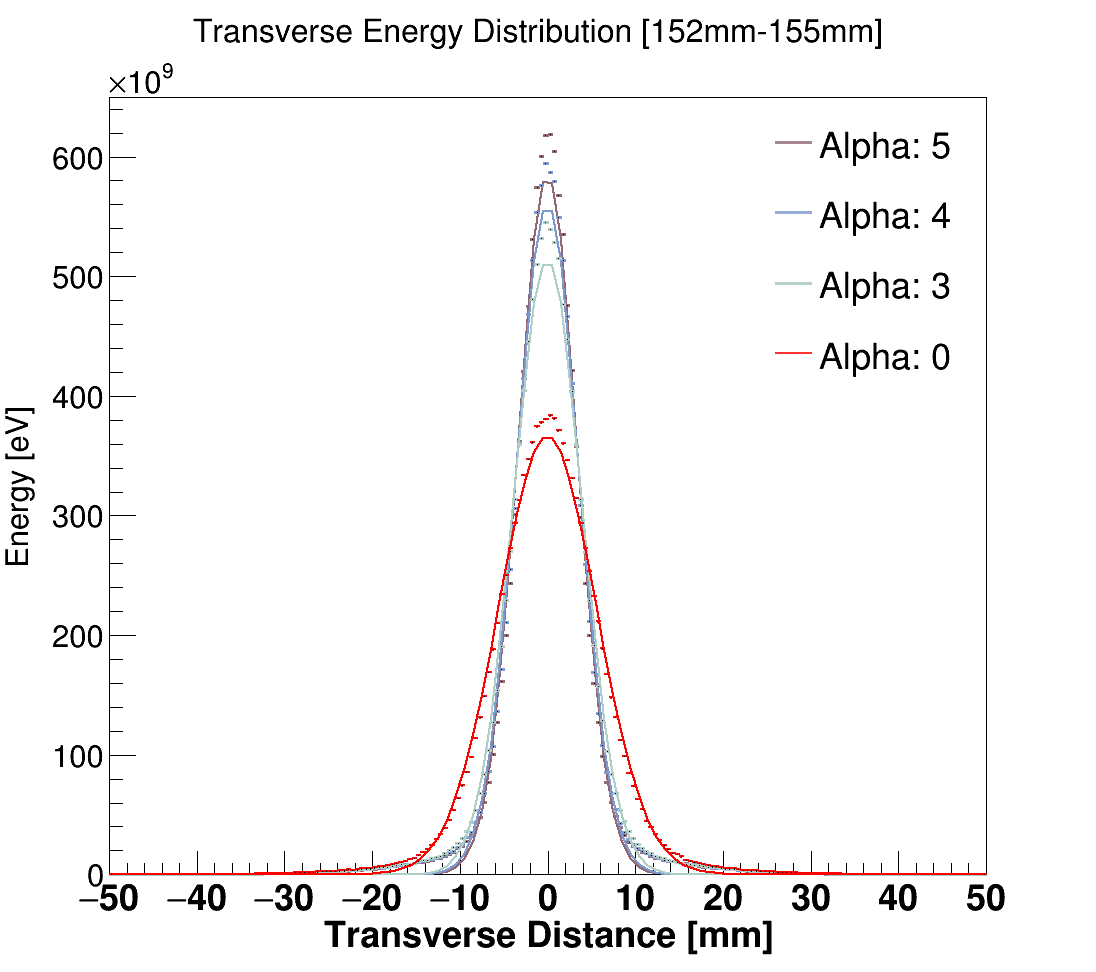

In [50]:

c1 = TCanvas( 'c1', 'c1', 1100, 1000 )
# Energy_x_BP1[5].GetXaxis().SetTitle("Transverse Distance [mm]");
# Energy_x_BP1[5].GetYaxis().SetTitle("Energy [eV]");
# Energy_x_BP1[5].GetXaxis().CenterTitle();
# Energy_x_BP1[5].GetYaxis().CenterTitle();
# #Energy_x_BP1[5].GetYaxis().SetRangeUser(0, 2*10e10)
# Energy_x_BP1[5].GetXaxis().SetRangeUser(-50, 50)
# Energy_x_BP1[5].SetTitle("Transverse Energy Distribution [152mm-155mm]")
# Energy_x_BP1[5].SetLineColorAlpha(4, 0.8)
# Energy_x_BP1[5].SetLineWidth(2)
# Energy_x_BP1[5].SetStats(0)
# Energy_x_BP1[5].Fit("gaus", "M")
# Energy_x_BP1[5].GetFunction("gaus").SetLineColor(4)
# Energy_x_BP1[5].Draw("SAME")

# Energy_x_BP1[4].SetLineColorAlpha(8, 0.8)
# Energy_x_BP1[4].SetLineWidth(3)
# Energy_x_BP1[4].SetStats(0)
# Energy_x_BP1[4].Fit("gaus", "M", "SAME")
# Energy_x_BP1[4].GetFunction("gaus").SetLineColor(8)
# Energy_x_BP1[4].Draw("SAME")

Energy_x_BP1[3].GetXaxis().SetTitle("Transverse Distance [mm]");
Energy_x_BP1[3].GetYaxis().SetTitle("Energy [eV]");
Energy_x_BP1[3].GetXaxis().CenterTitle();
Energy_x_BP1[3].GetYaxis().CenterTitle();
#Energy_x_BP1[3].GetYaxis().SetRangeUser(0, 2*10e10)
Energy_x_BP1[3].GetXaxis().SetRangeUser(-50, 50)
Energy_x_BP1[3].SetTitle("Transverse Energy Distribution [152mm-155mm]")
Energy_x_BP1[3].SetLineColorAlpha(49, 0.8)
Energy_x_BP1[3].SetLineWidth(3)
Energy_x_BP1[3].SetStats(0)
Energy_x_BP1[3].Fit("gaus", "M", "SAME")
Energy_x_BP1[3].GetFunction("gaus").SetLineColor(49)
Energy_x_BP1[3].Draw("SAME")

Energy_x_BP1[2].SetLineColorAlpha(38, 0.8)
Energy_x_BP1[2].SetLineWidth(3)
Energy_x_BP1[2].SetStats(0)
Energy_x_BP1[2].Fit("gaus", "M", "SAME")
Energy_x_BP1[2].GetFunction("gaus").SetLineColor(38)
Energy_x_BP1[2].Draw("SAME")

Energy_x_BP1[1].SetLineColorAlpha(29, 0.9)
Energy_x_BP1[1].SetLineWidth(3)
Energy_x_BP1[1].SetStats(0)
Energy_x_BP1[1].Fit("gaus", "M", "SAME")
Energy_x_BP1[1].GetFunction("gaus").SetLineColor(29)
Energy_x_BP1[1].Draw("SAME")

Energy_x_BP1[0].SetLineColorAlpha(2, 0.8)
Energy_x_BP1[0].SetLineWidth(2)
Energy_x_BP1[0].SetStats(0)
Energy_x_BP1[0].Fit("gaus", "M", "SAME")
Energy_x_BP1[0].GetFunction("gaus").SetLineColor(2)
Energy_x_BP1[0].Draw("SAME")

legend = TLegend(.7,.6,.89,.89)
# legend.AddEntry(Energy_x_BP1[5],"Alpha: 7","L");
# legend.AddEntry(Energy_x_BP1[4],"Alpha: 6","L");
legend.AddEntry(Energy_x_BP1[3],"Alpha: 5","L");
legend.AddEntry(Energy_x_BP1[2],"Alpha: 4","L");
legend.AddEntry(Energy_x_BP1[1],"Alpha: 3","L");
legend.AddEntry(Energy_x_BP1[0],"Alpha: 0","L");

legend.SetTextFont(42)
legend.SetTextSize(.04)
legend.SetBorderSize(0)
legend.Draw()

c1.Draw()
c1.Print("Transverse_Energy_Dis_BP(4mm)_GausFit(152mm-155)R4mmalpha0t05.png")

In [ ]:
alpha = [0, 3, 4, 5]
sigma4mmFocus = [5.61522, 3.91820, 3.5775, 3.42304]

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file Energy Distribution Energy_80_Alpha:_7.0_Beta:_350.0mm_Sigma_2.0.mm.png has been created


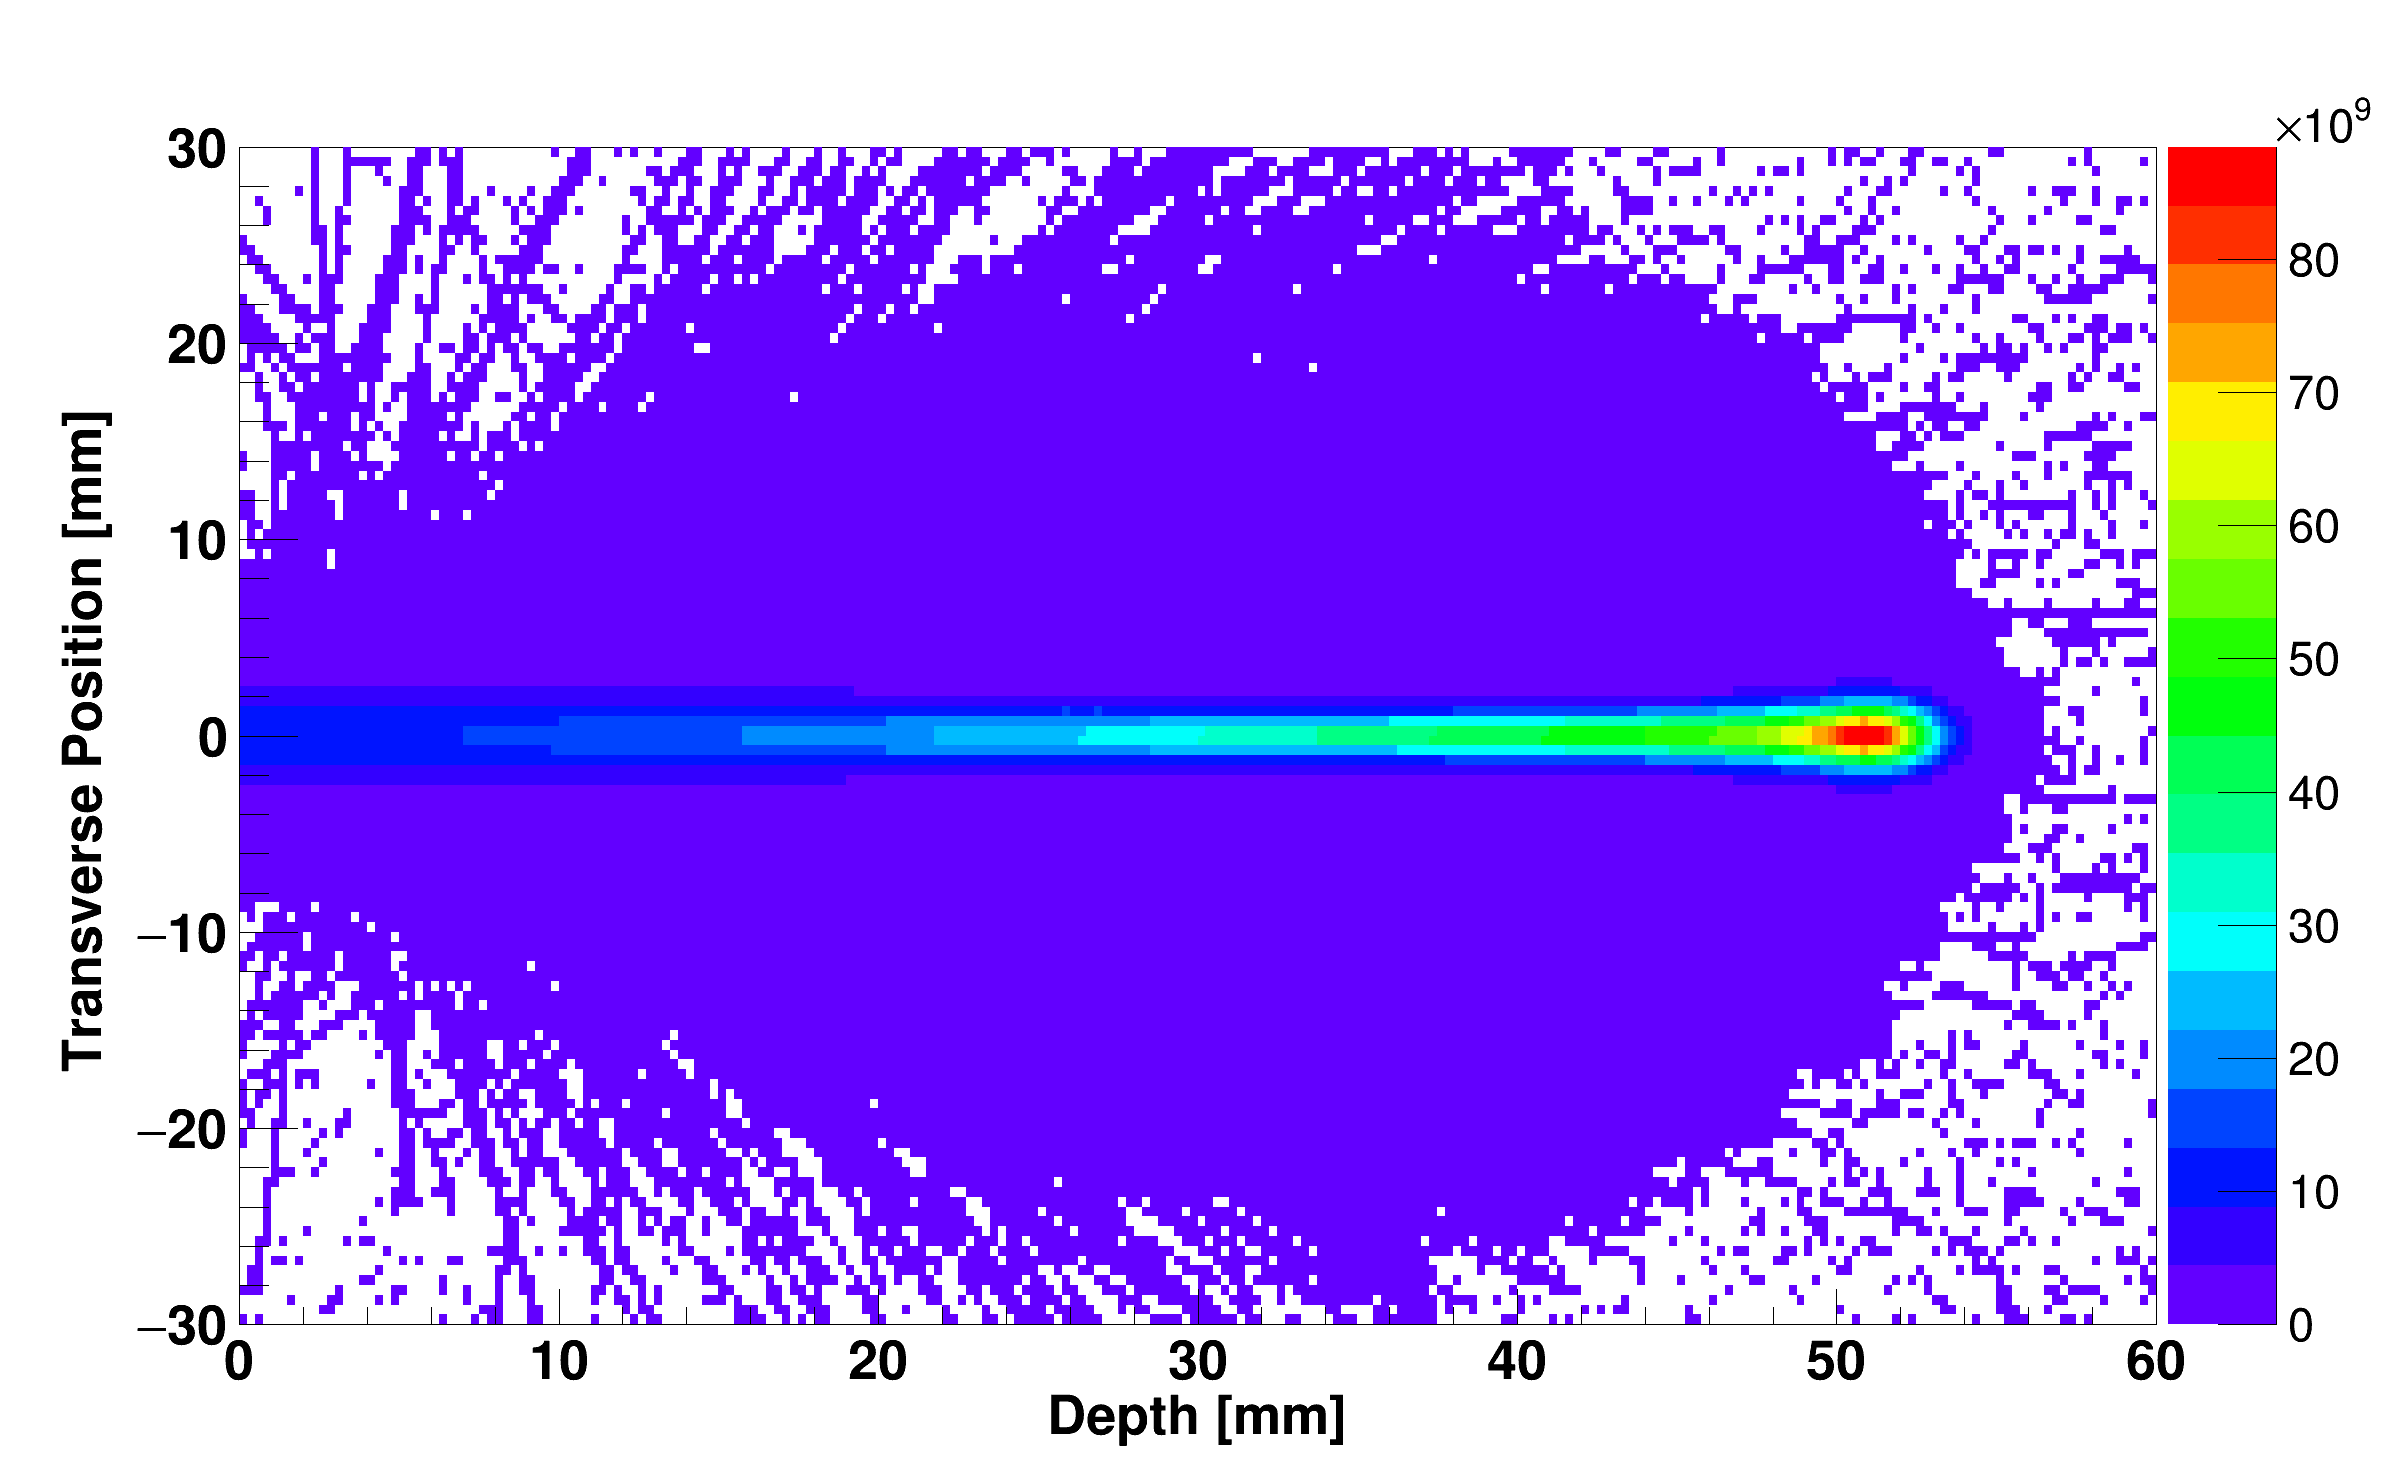

In [267]:


#DataFile = ROOT.TFile("/home/fardousr/Desktop/Output/Convergent_Data/Energy_350_Alpha:_7.0_Beta:_300.0mm_Sigma_10.mm.root")
DataFile = ROOT.TFile("/home/fardousr/Desktop/Output/Convergent_Data/Energy_80_Alpha:_7.0_Beta:_350.0mm_Sigma_2.0mm.root")
hist = DataFile.Get('ProtonEnergyHisto').Project3D("yz")

can1 = TCanvas( 'c1', 'Deterministic LET', 200, 10, 2400, 1500)
can1.SetFillColor( 0 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
hist.GetXaxis().SetTitle("Depth [mm]");
hist.GetYaxis().SetTitle("Transverse Position [mm]");
hist.Draw()
hist.GetXaxis().CenterTitle();
hist.GetYaxis().CenterTitle();
hist.GetXaxis().SetRangeUser(0, 60);
hist.GetYaxis().SetRangeUser(-30, 30);
hist.Draw("COLZ")
hist.SetTitle("")
gStyle.SetPalette(1)
hist.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()
can1.Print("Energy Distribution Energy_80_Alpha:_7.0_Beta:_350.0mm_Sigma_2.0.mm.png")

 FCN=324912 FROM HESSE     STATUS=OK             16 CALLS         117 TOTAL
                     EDM=2.97571e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.25425e+12   5.92422e+08   2.99038e+05   1.70319e-14
   2  Mean         6.98067e-04   4.01676e-04   2.23589e-05   6.88971e-02
   3  Sigma        1.10180e+00   3.49885e-04   6.88164e-07   3.05855e+00


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file Transverse Size Energy_80_Alpha:_7.0_Beta:_350.0mm_Sigma_10.mm.png has been created


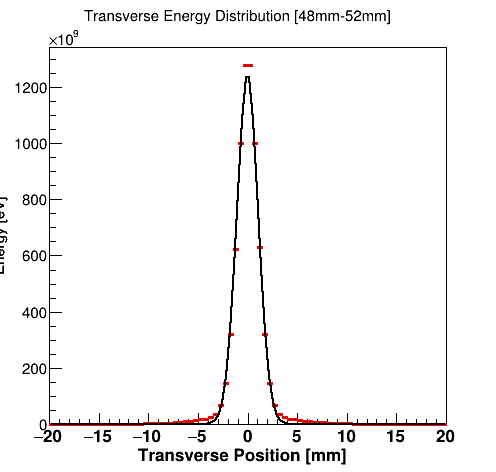

In [268]:
c1 = TCanvas( 'c1', 'c1', 500, 500 )
#DataFile = ROOT.TFile("/home/fardousr/Desktop/Output/Convergent_Data/Energy_150_Alpha:_20._Beta:_3100.mm_Sigma_4.0mm.root")
Energy = DataFile.Get('ProtonEnergyHisto').Clone("Alpha_"+str(i))
Energy.SetDirectory(0)
name = "_x"
Distribution = Energy.ProjectionY(name, -200, 200, 48*4, 52*4).Clone(name)
Distribution.SetDirectory(0)

Distribution.GetXaxis().SetTitle("Transverse Position [mm]");
Distribution.GetYaxis().SetTitle("Energy [eV]");
Distribution.GetXaxis().CenterTitle();
Distribution.GetYaxis().CenterTitle();
#Energy_x_BP1[3].GetYaxis().SetRangeUser(0, 2*10e10)
Distribution.GetXaxis().SetRangeUser(-20, 20)
Distribution.SetTitle("Transverse Energy Distribution [48mm-52mm]")
Distribution.SetLineColor(2)
Distribution.SetLineWidth(3)
Distribution.SetStats(0)
Distribution.Fit("gaus", "M", "SAME")
Distribution.GetFunction("gaus").SetLineColor(1)
Distribution.Draw("SAME")
c1.Draw()
c1.Print("Transverse Size Energy_80_Alpha:_7.0_Beta:_350.0mm_Sigma_10.mm.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file Radial Energy Deposition Energy_80_Alpha:_7.0_Beta:_350.0mm_Sigma_10.mm.png has been created


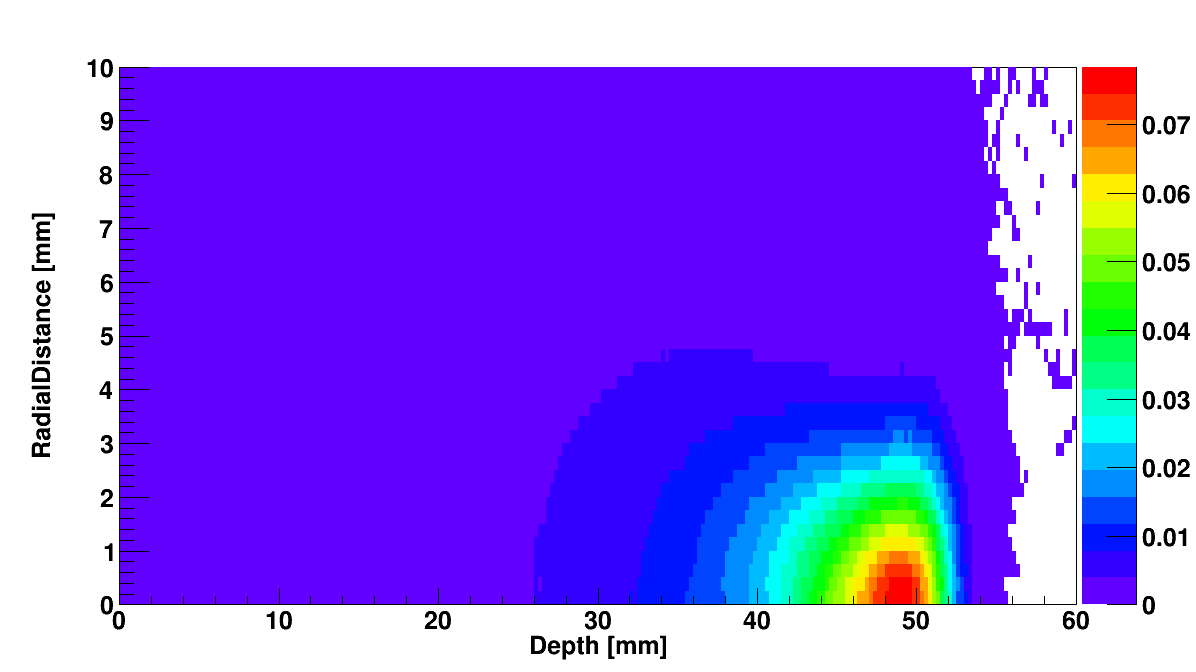

In [258]:
#DataFile = ROOT.TFile("/home/fardousr/Desktop/Output/Convergent_Data/Energy_350_Alpha:_7.0_Beta:_300.0mm_Sigma_10.mm.root")
hist = DataFile.Get('ProtonRadialHisto')

hist = DataFile.Get('ProtonRadialHisto').Clone()
hist.SetDirectory(0)
for i in range (1, 201):
    for j in range (1, 801):
        x = hist.GetBinContent(j,i)#*1.60218e-19
        mass = mt.pi*((0.25*i)**2-(0.25*(i-1))**2)*0.25*997
        hist.SetBinContent(j,i,x/mass*1e-9)
        
can1 = TCanvas( 'c1', 'Dose', 1200, 700)
can1.SetFillColor( 0)
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
hist.GetXaxis().SetTitle("Depth [mm]");
hist.GetYaxis().SetTitle("RadialDistance [mm]");
hist.Draw()
hist.GetXaxis().CenterTitle();
hist.GetYaxis().CenterTitle();
hist.GetXaxis().SetRangeUser(0, 60);
hist.GetYaxis().SetRangeUser(0, 10);
hist.SetTitle("")
hist.SetStats(0)
hist.Draw("COLZ")
gStyle.SetPalette(1)
can1.Modified()
can1.Update()
can1.Draw()
can1.Print("Radial Energy Deposition Energy_80_Alpha:_7.0_Beta:_350.0mm_Sigma_10.mm.png")